# Importar as bibliotecas

In [1]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb # todo: arrancar a seaborn do codigo.

# Parametros fixos da simulação

In [2]:
tstep = 0.01 # passo de tempo
M = 0.5 # massa do carrinho
m = 0.2 # massa do pendulo
b = 0.1 # coeficiente de atrito
l = 0.3 # distancia do centro de massa
g = 9.81 # gravidade

# Equações de estados para a simulação

In [3]:
def sistemaPendulo(x,v,theta,dtheta,u,dt):
    t = 0
    while True:
        controlForce = u(x,theta,v,dtheta)
        ddtheta = (controlForce*np.cos(theta)-(m+M)*g*np.sin(theta)+m*l*np.sin(theta)*np.cos(theta)*(dtheta**2))/(m*l*np.cos(theta)**2-l*(M+m))
        a = (controlForce + m*l*np.sin(theta)*dtheta**2 - m*g*np.cos(theta)*np.sin(theta))/(M+m-m*np.cos(theta)**2)
        v = v + a*dt
        x = x + v*dt
        dtheta = dtheta + ddtheta*dt
        theta = theta + dtheta*dt
        t = t + dt
        yield x,v,a,theta,dtheta,ddtheta,controlForce,t
        

# Declaração do Controlador PID sem o carrinho

In [4]:
class PID1():
    integralPendulum = 0
    def __init__(self,kp,ki,kd):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.ip_signal = []    
    def calculateForce(self,x,theta,v,dtheta):
        self.integralPendulum = self.integralPendulum + theta
        self.ip_signal.append(self.integralPendulum)
        self.forcePendulum = self.kp*theta
        self.integralForcePendulum = self.ki*self.integralPendulum
        self.derivativeForcePendulum = self.kd*dtheta
        self.force = self.forcePendulum + \
                     self.integralForcePendulum + \
                     self.derivativeForcePendulum
        return self.force

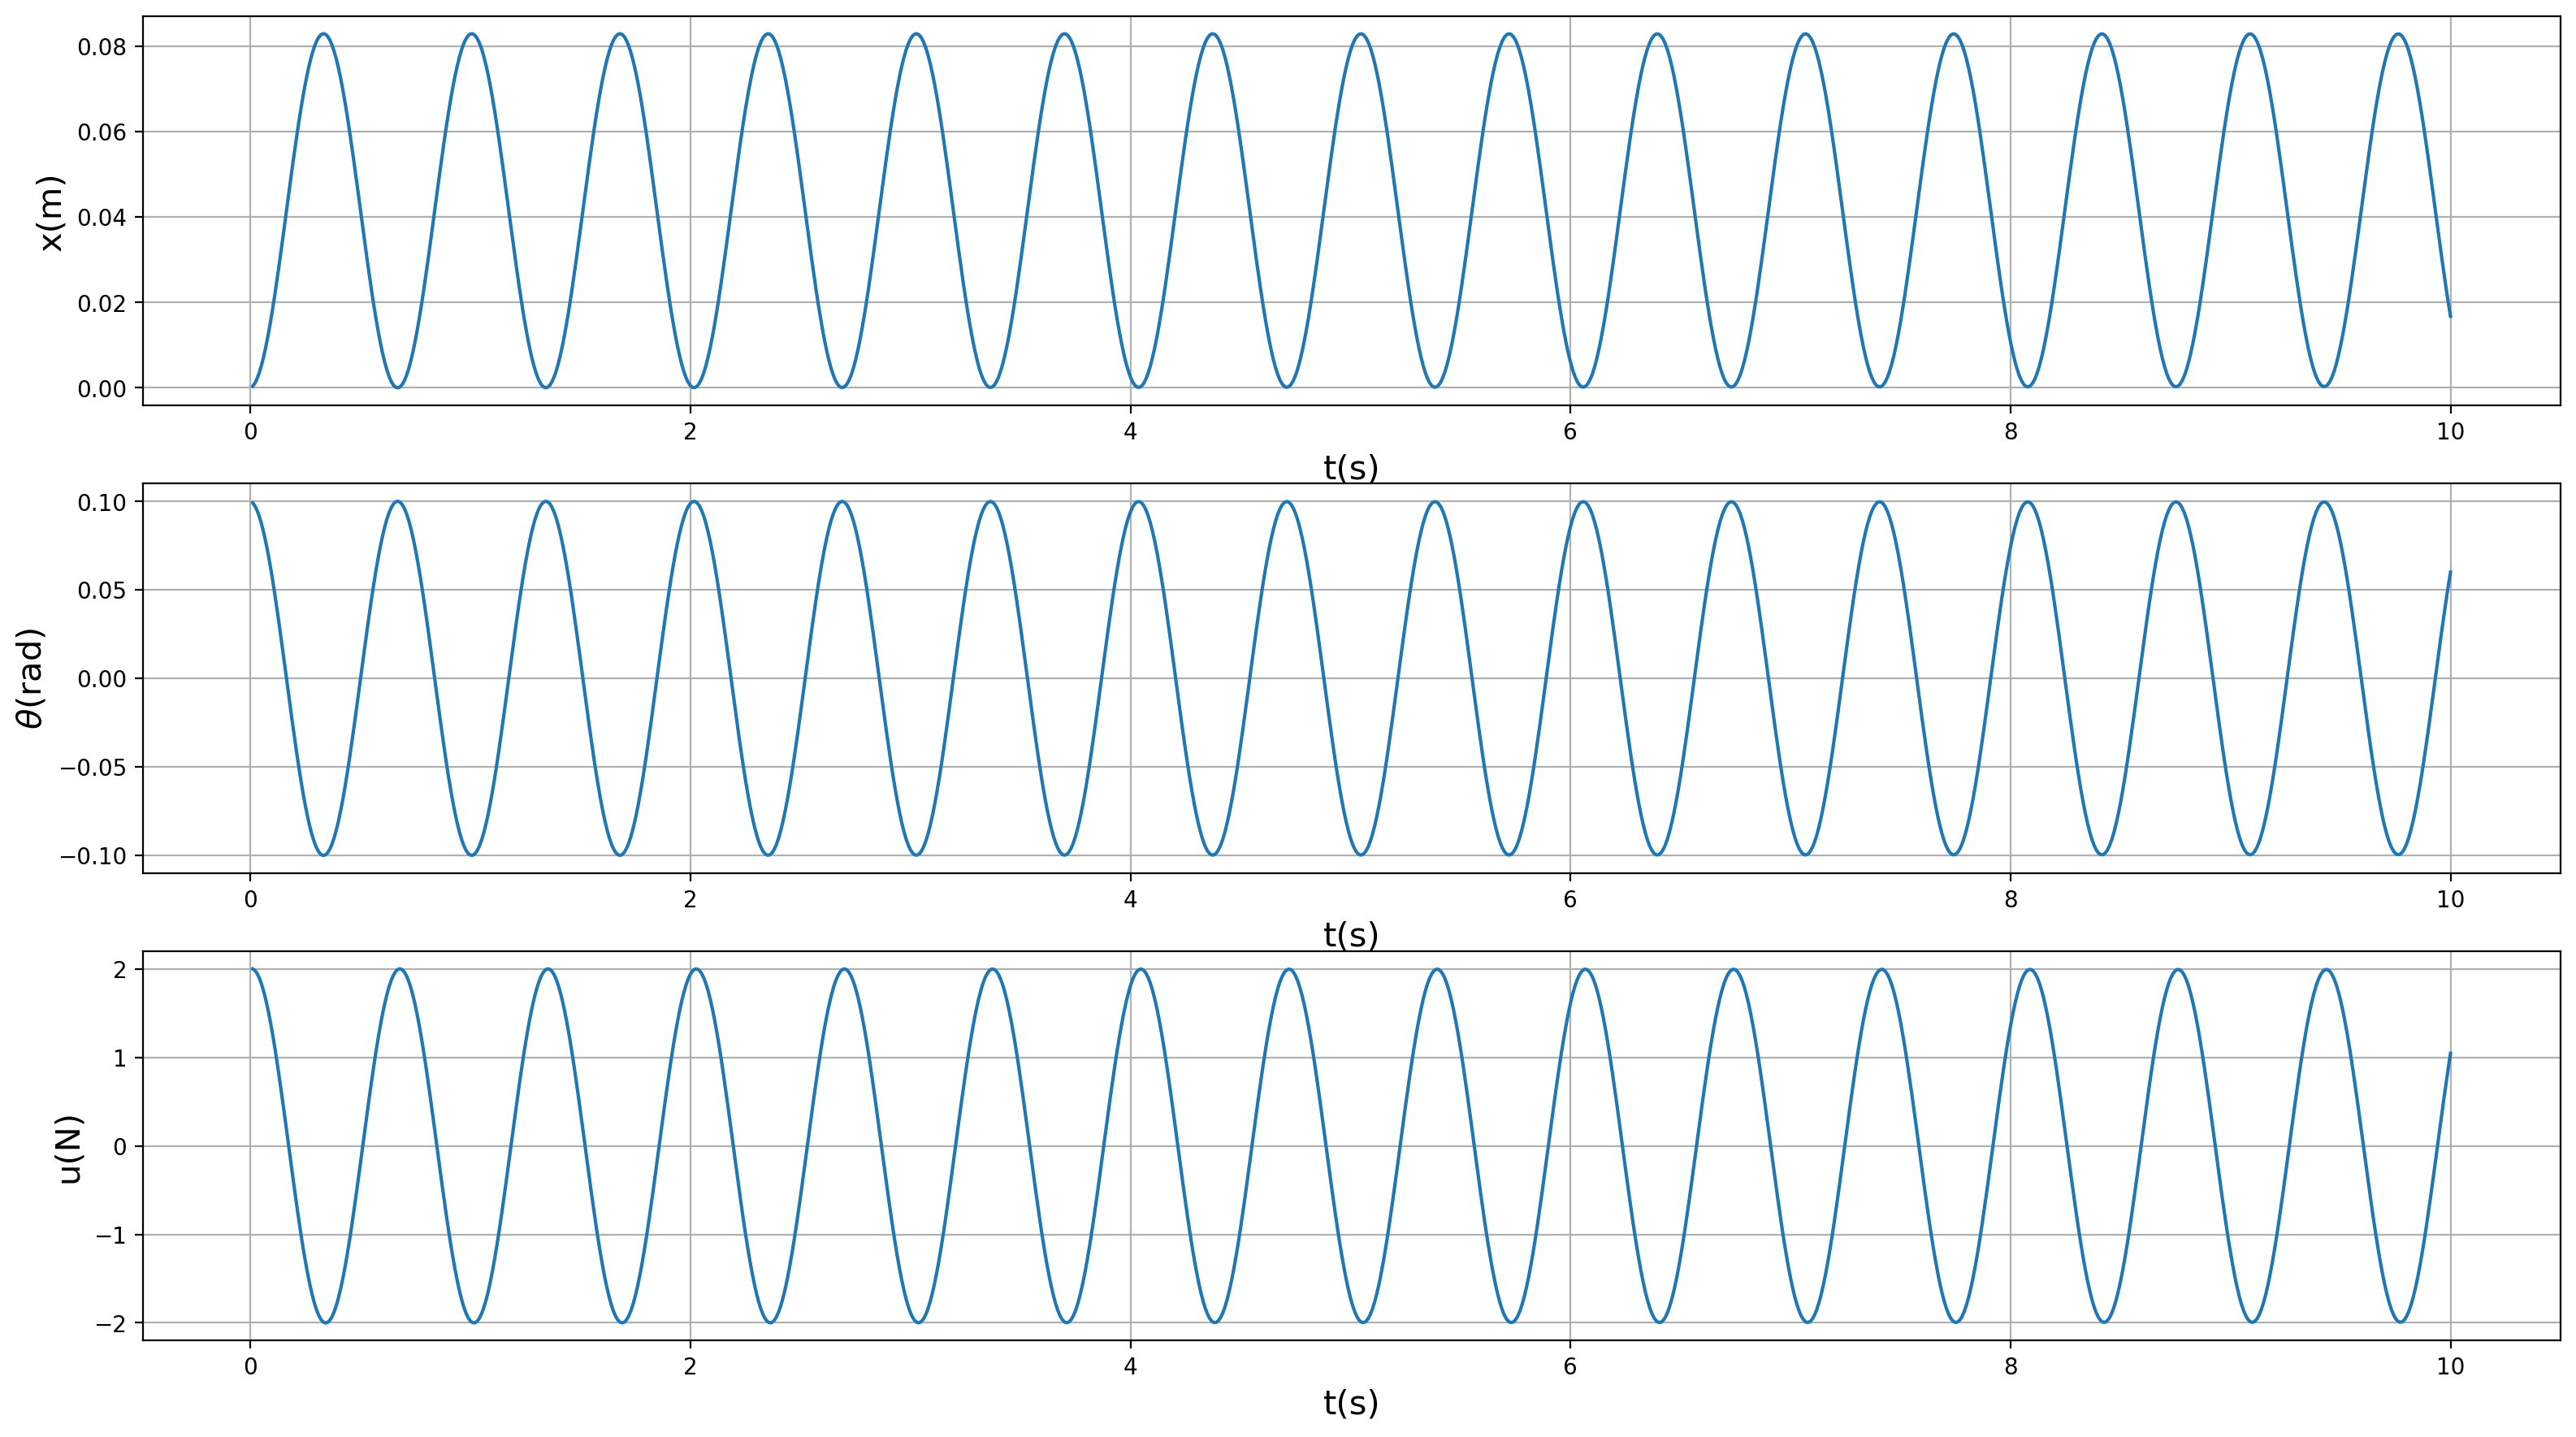

In [5]:
controller = PID1(20,0,0)
pendulo = sistemaPendulo(0,0,0.1,0,controller.calculateForce, tstep)
fig, ax = plt.subplots(3,figsize=(19.20,10.80),dpi=200)
tmpv = []
for i in range(0,1000):
    tmpv.append(next(pendulo))
ax[0].plot([aux[7] for aux in tmpv],[aux[0] for aux in tmpv])
ax[1].plot([aux[7] for aux in tmpv],[aux[3] for aux in tmpv])
ax[2].plot([aux[7] for aux in tmpv],[aux[6] for aux in tmpv])
ax[0].set_ylabel("x(m)",size=15)
ax[0].set_xlabel("t(s)",size=15)
ax[1].set_ylabel(r'$\theta$(rad)',size = 15)
ax[1].set_xlabel("t(s)",size=15)
ax[2].set_ylabel("u(N)",size=15)
ax[2].set_xlabel("t(s)",size=15)
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.savefig("../images/controladorP.png")

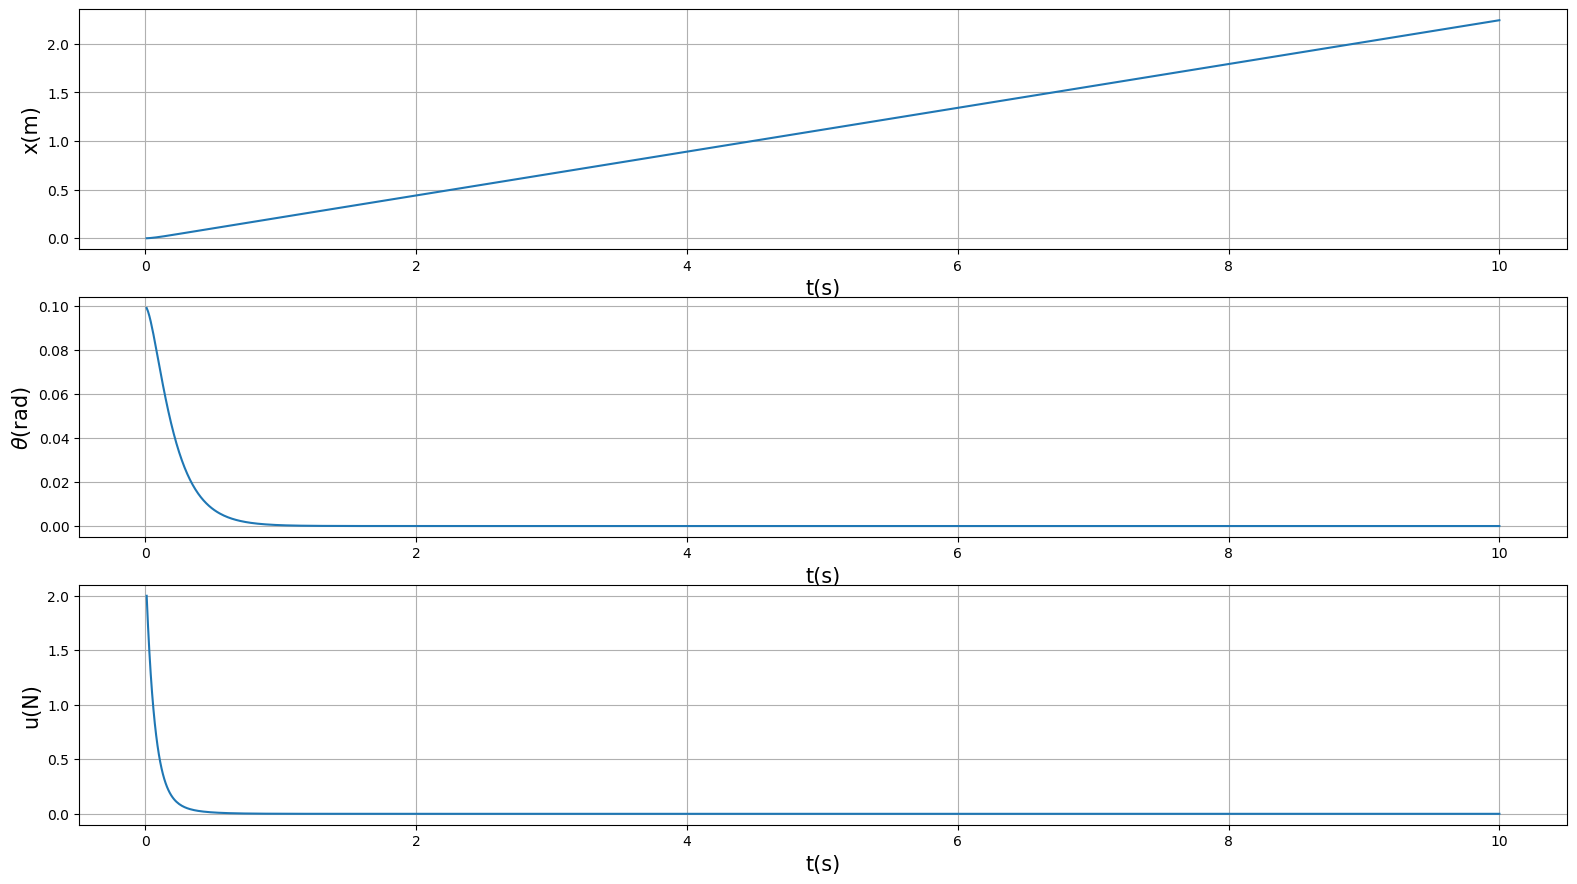

In [6]:
controller = PID1(20,0,3)
pendulo = sistemaPendulo(0,0,0.1,0,controller.calculateForce, tstep)
fig, ax = plt.subplots(3,figsize=(19.20,10.80),dpi=100)
tmpv = []
for i in range(0,1000):
    tmpv.append(next(pendulo))
ax[0].plot([aux[7] for aux in tmpv],[aux[0] for aux in tmpv])
ax[1].plot([aux[7] for aux in tmpv],[aux[3] for aux in tmpv])
ax[2].plot([aux[7] for aux in tmpv],[aux[6] for aux in tmpv])
ax[0].set_ylabel("x(m)",size=15)
ax[0].set_xlabel("t(s)",size=15)
ax[1].set_ylabel(r'$\theta$(rad)',size = 15)
ax[1].set_xlabel("t(s)",size=15)
ax[2].set_ylabel("u(N)",size=15)
ax[2].set_xlabel("t(s)",size=15)
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.savefig("../images/controladorPD.png")

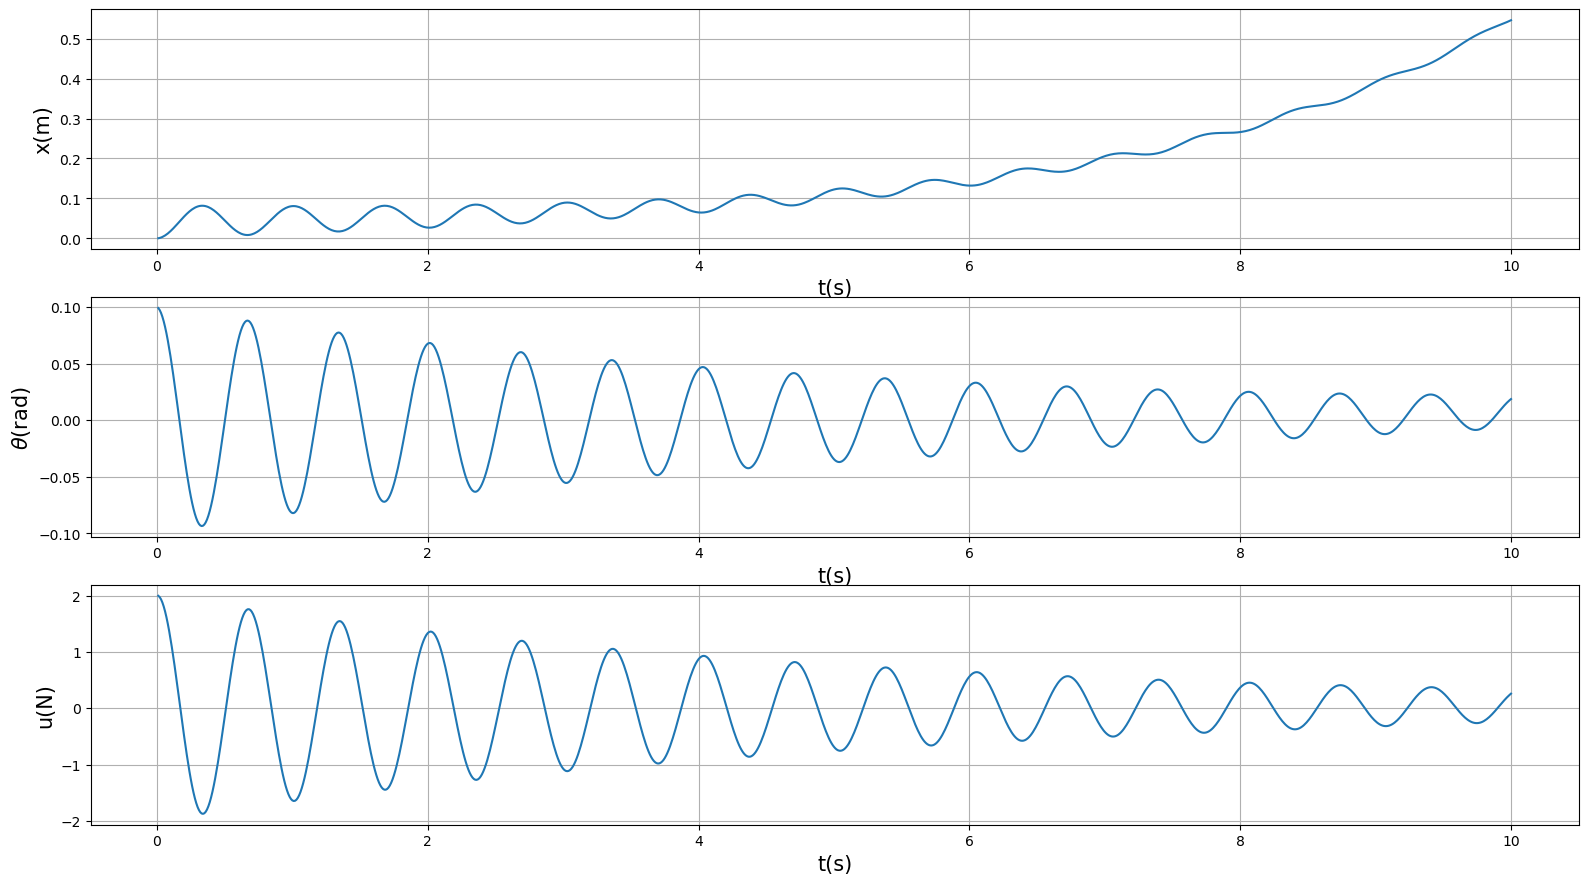

In [7]:
controller = PID1(20,-0.05,0)
pendulo = sistemaPendulo(0,0,0.1,0,controller.calculateForce, tstep)
fig, ax = plt.subplots(3,figsize=(19.20,10.80),dpi=100)
tmpv = []
for i in range(0,1000):
    tmpv.append(next(pendulo))
ax[0].plot([aux[7] for aux in tmpv],[aux[0] for aux in tmpv])
ax[1].plot([aux[7] for aux in tmpv],[aux[3] for aux in tmpv])
ax[2].plot([aux[7] for aux in tmpv],[aux[6] for aux in tmpv])
ax[0].set_ylabel("x(m)",size=15)
ax[0].set_xlabel("t(s)",size=15)
ax[1].set_ylabel(r'$\theta$(rad)',size = 15)
ax[1].set_xlabel("t(s)",size=15)
ax[2].set_ylabel("u(N)",size=15)
ax[2].set_xlabel("t(s)",size=15)
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.savefig("../images/controladorPI.png")

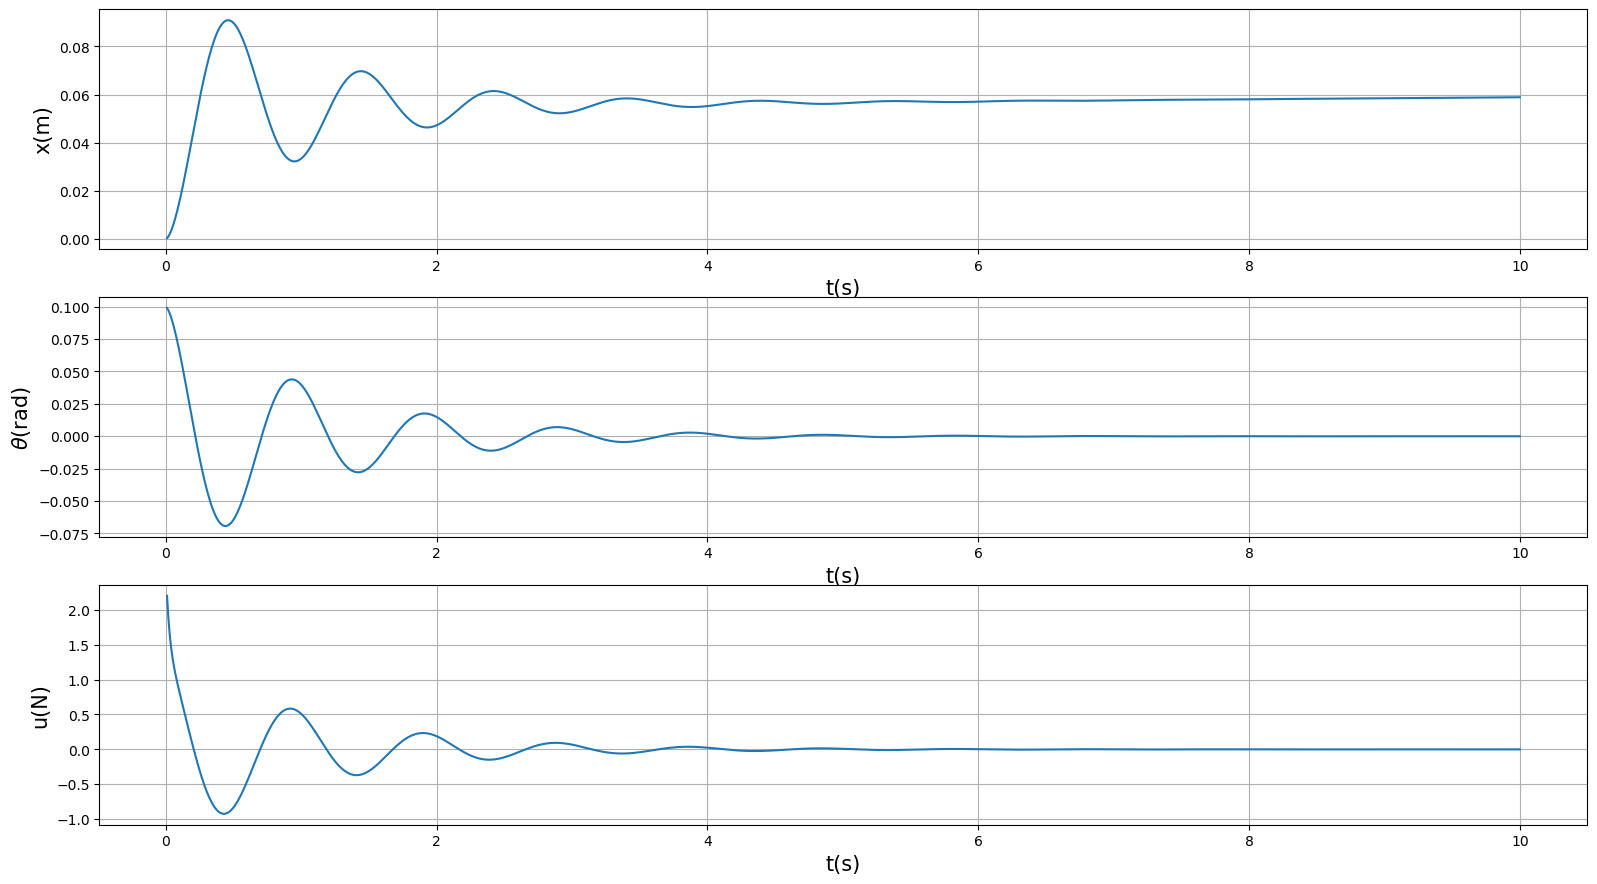

In [8]:
controller = PID1(20,2,5)
pendulo = sistemaPendulo(0,0,0.1,0,controller.calculateForce, tstep)
fig, ax = plt.subplots(3,figsize=(19.20,10.80),dpi=100)
tmpv = []
for i in range(0,1000):
    tmpv.append(next(pendulo))
ax[0].plot([aux[7] for aux in tmpv],[aux[0] for aux in tmpv])
ax[1].plot([aux[7] for aux in tmpv],[aux[3] for aux in tmpv])
ax[2].plot([aux[7] for aux in tmpv],[aux[6] for aux in tmpv])
ax[0].set_ylabel("x(m)",size=15)
ax[0].set_xlabel("t(s)",size=15)
ax[1].set_ylabel(r'$\theta$(rad)',size = 15)
ax[1].set_xlabel("t(s)",size=15)
ax[2].set_ylabel("u(N)",size=15)
ax[2].set_xlabel("t(s)",size=15)
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.savefig("../images/controladorPID.png")

# Mapa de respostas do controlador PID

controller = PID1(20,2,5)
total = []
plt.figure(figsize=(15,15))
for theta in np.linspace(-np.pi,np.pi,100):
    row = []
    for dtheta in np.linspace(-10,10,100):
        row.append(controller.calculateForce(0,theta,0,dtheta))
    total.append(row)
total = np.array(total)
ax = sb.heatmap(total,cmap="hot")
ax.invert_yaxis()
plt.savefig("../images/heatmapPID_nocart.png")

# Declaração do Controlador PID com o carrinho

In [9]:
class PID():
    integralPendulum = 0
    integralCart = 0
    def __init__(self,kpp,kpc,kip,kic,kdp,kdc):
        self.kpp = kpp
        self.kpc = kpc
        self.kip = kip
        self.kic = kic
        self.kdp = kdp
        self.kdc = kdc
        self.ip_signal = []
        self.ic_signal = []
    def calculateForce(self,x,theta,v,dtheta):
        self.tanhx = np.tanh(x)
        self.integralPendulum = self.integralPendulum + theta
        self.ip_signal.append(self.integralPendulum)
        self.integralCart = self.integralCart + self.tanhx
        self.ic_signal.append(self.integralCart)
        self.forcePendulum = self.kpp*theta
        self.forceCart = self.kpc*self.tanhx
        self.integralForcePendulum = self.kip*self.integralPendulum
        self.integralForceCart = self.kic*self.integralCart
        self.derivativeForcePendulum = self.kdp*dtheta
        self.derivativeForceCart = self.kdc*v
        self.force = self.forceCart + \
                     self.forcePendulum + \
                     self.integralForceCart + \
                     self.integralForcePendulum + \
                     self.derivativeForcePendulum + \
                     self.derivativeForceCart
        return self.force

# Controlador P

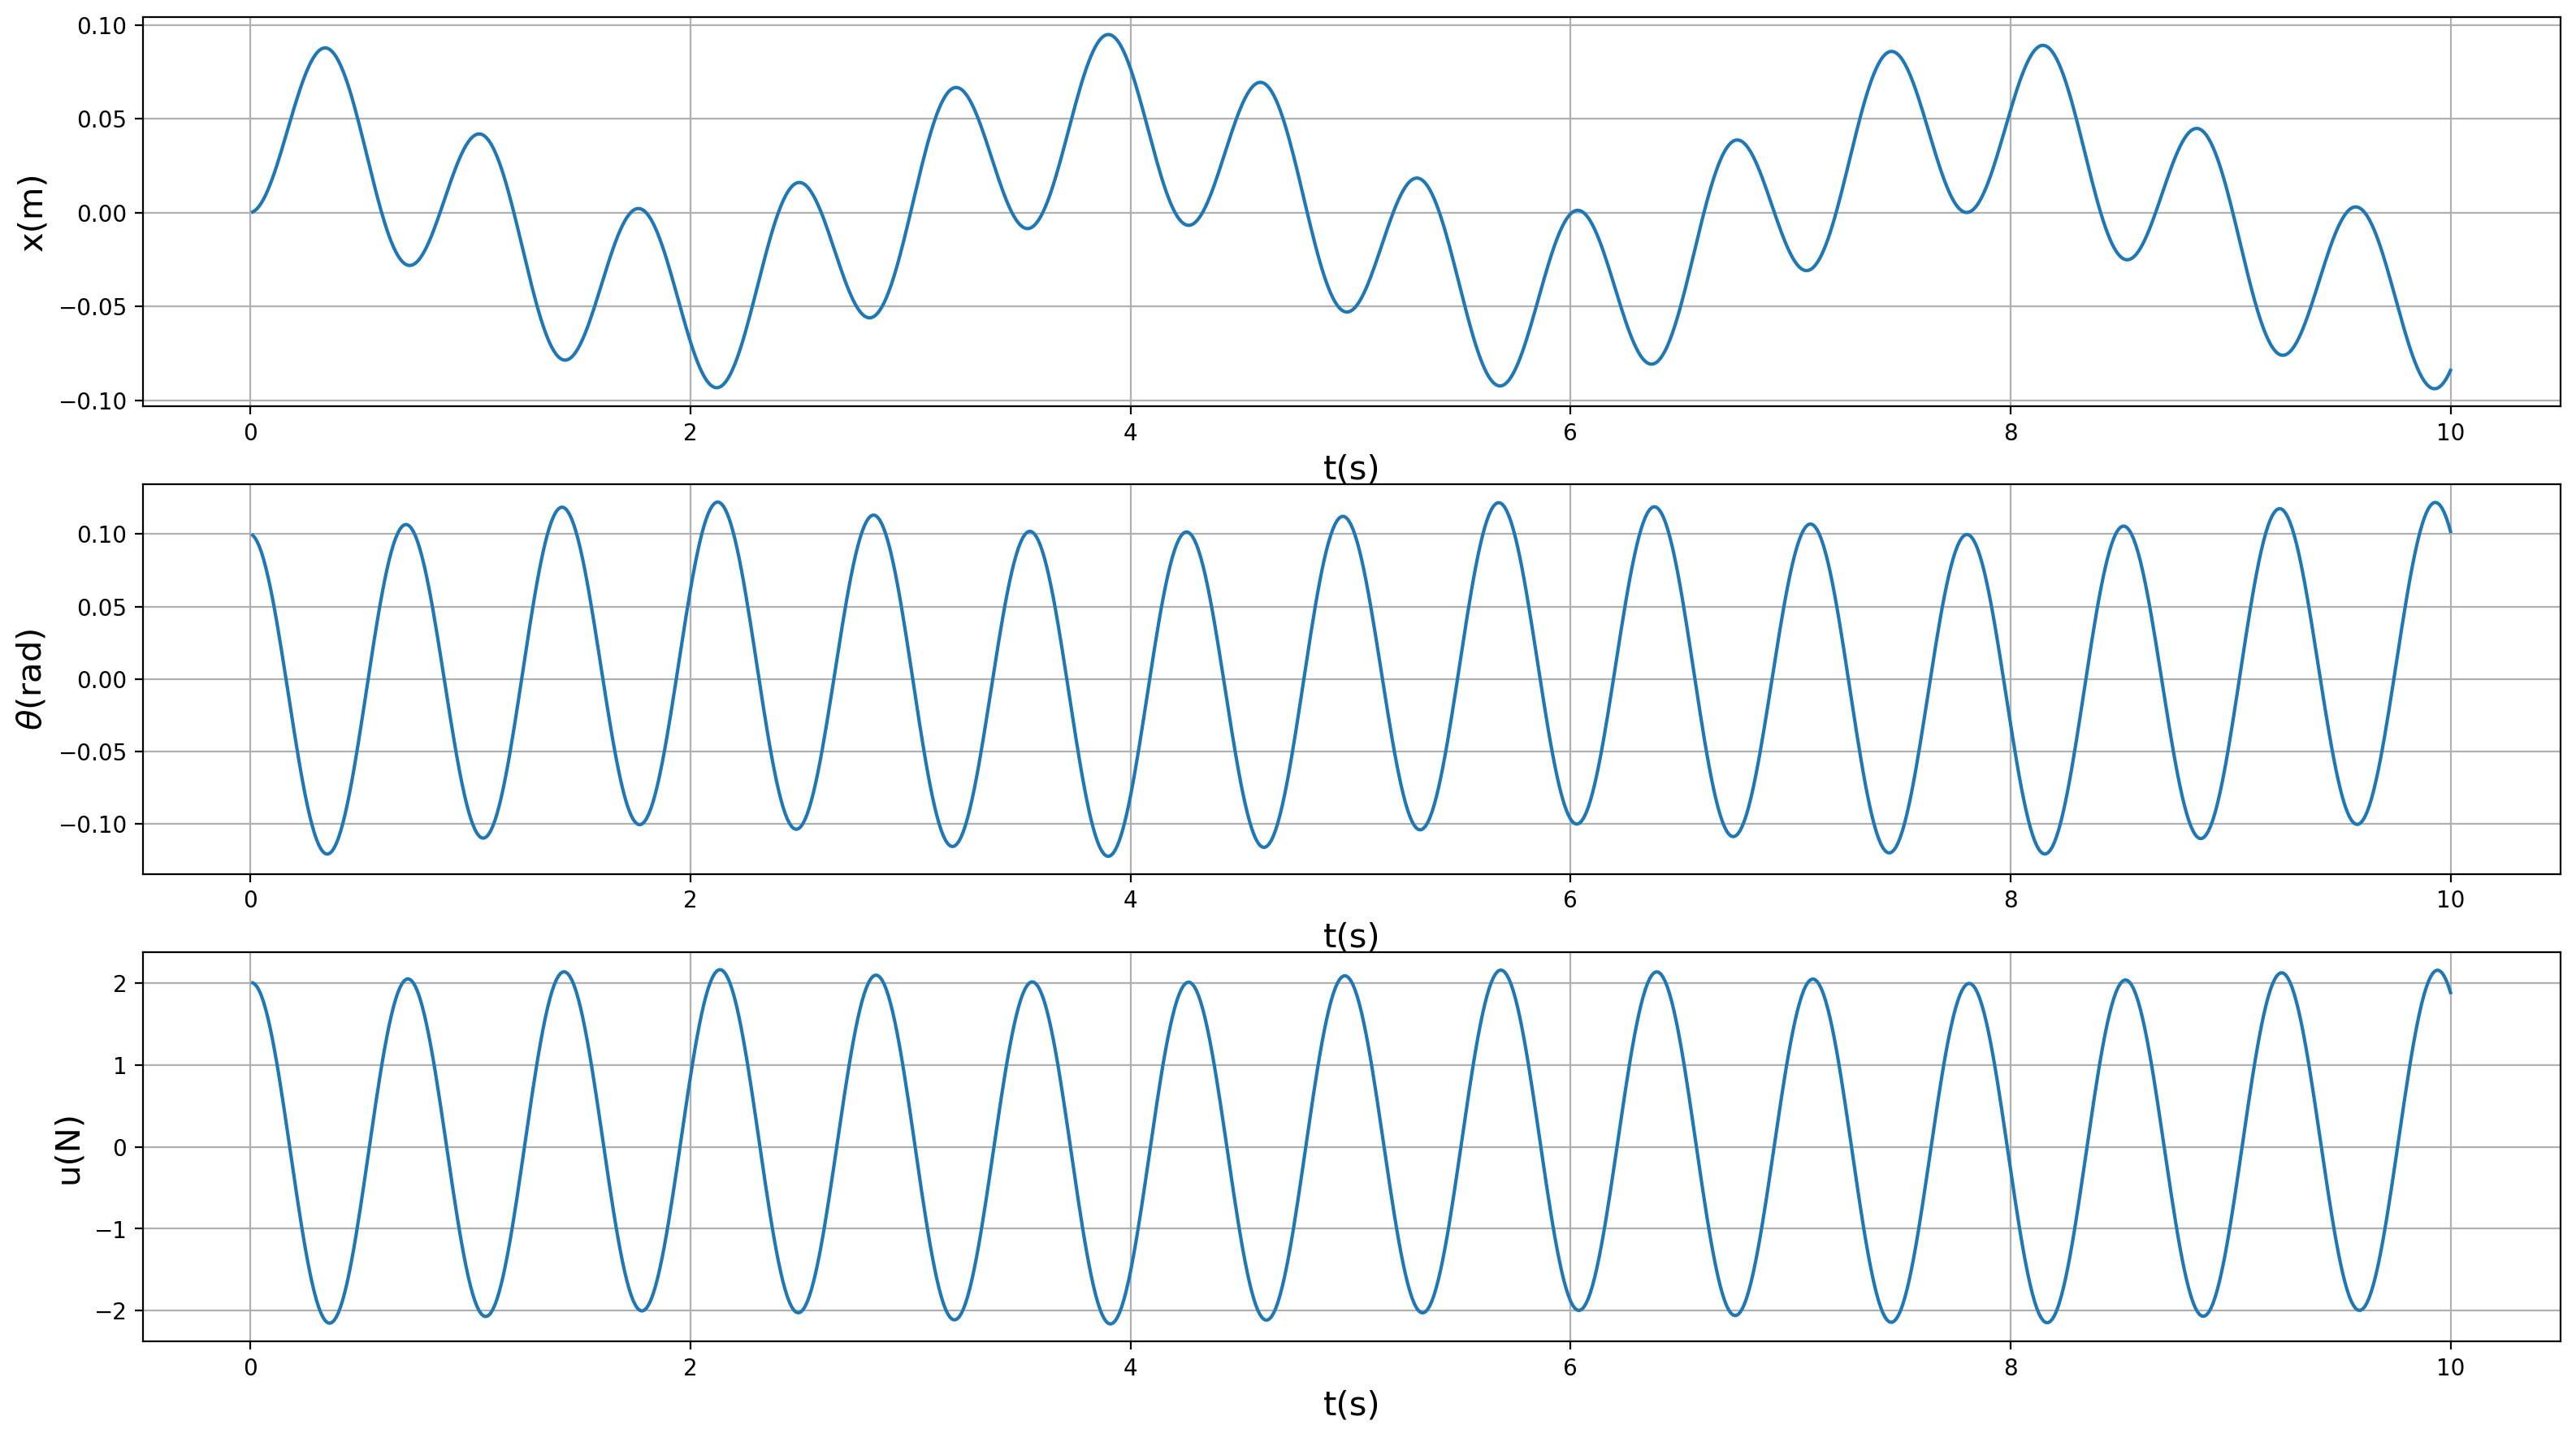

In [10]:
controller = PID(20,3,0,0,0,0)
pendulo = sistemaPendulo(0,0,0.1,0,controller.calculateForce, tstep)
fig, ax = plt.subplots(3,figsize=(19.20,10.80),dpi=200)
tmpv = []
for i in range(0,1000):
    tmpv.append(next(pendulo))
ax[0].plot([aux[7] for aux in tmpv],[aux[0] for aux in tmpv])
ax[1].plot([aux[7] for aux in tmpv],[aux[3] for aux in tmpv])
ax[2].plot([aux[7] for aux in tmpv],[aux[6] for aux in tmpv])
ax[0].set_ylabel("x(m)",size=15)
ax[0].set_xlabel("t(s)",size=15)
ax[1].set_ylabel(r'$\theta$(rad)',size = 15)
ax[1].set_xlabel("t(s)",size=15)
ax[2].set_ylabel("u(N)",size=15)
ax[2].set_xlabel("t(s)",size=15)
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.savefig("../images/controladorP_C.png")

# Controlador PD

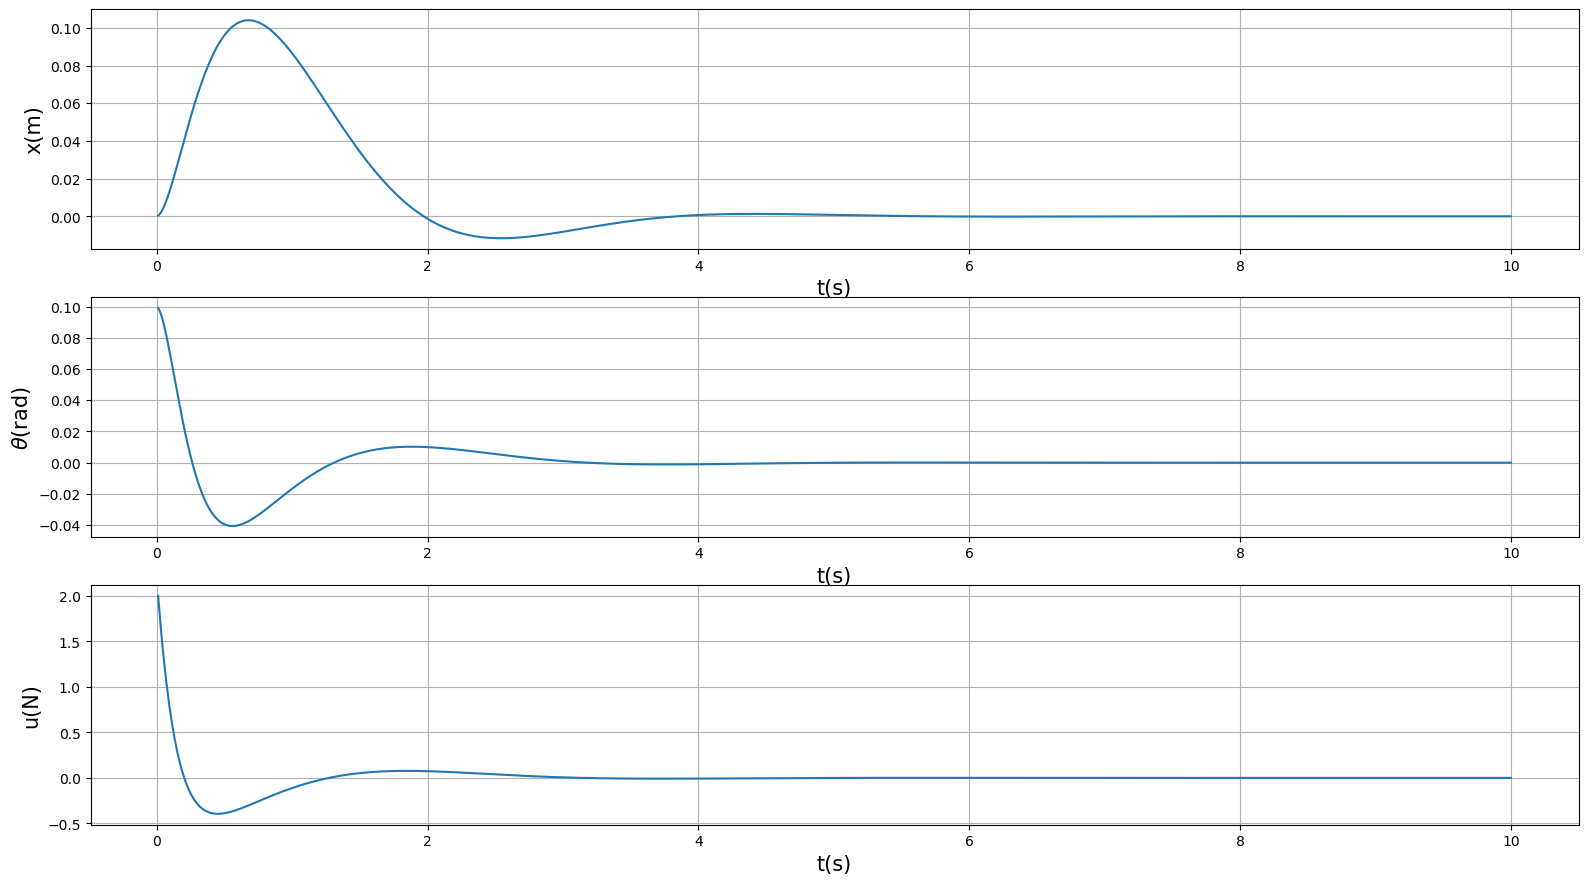

In [11]:
controller = PID(20,3,0,0,3,2.5)
pendulo = sistemaPendulo(0,0,0.1,0,controller.calculateForce, tstep)
fig, ax = plt.subplots(3,figsize=(19.20,10.80),dpi=100)
tmpv = []
for i in range(0,1000):
    tmpv.append(next(pendulo))
ax[0].plot([aux[7] for aux in tmpv],[aux[0] for aux in tmpv])
ax[1].plot([aux[7] for aux in tmpv],[aux[3] for aux in tmpv])
ax[2].plot([aux[7] for aux in tmpv],[aux[6] for aux in tmpv])
ax[0].set_ylabel("x(m)",size=15)
ax[0].set_xlabel("t(s)",size=15)
ax[1].set_ylabel(r'$\theta$(rad)',size = 15)
ax[1].set_xlabel("t(s)",size=15)
ax[2].set_ylabel("u(N)",size=15)
ax[2].set_xlabel("t(s)",size=15)
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.savefig("../images/controladorPD_C.png")

# Controlador PI

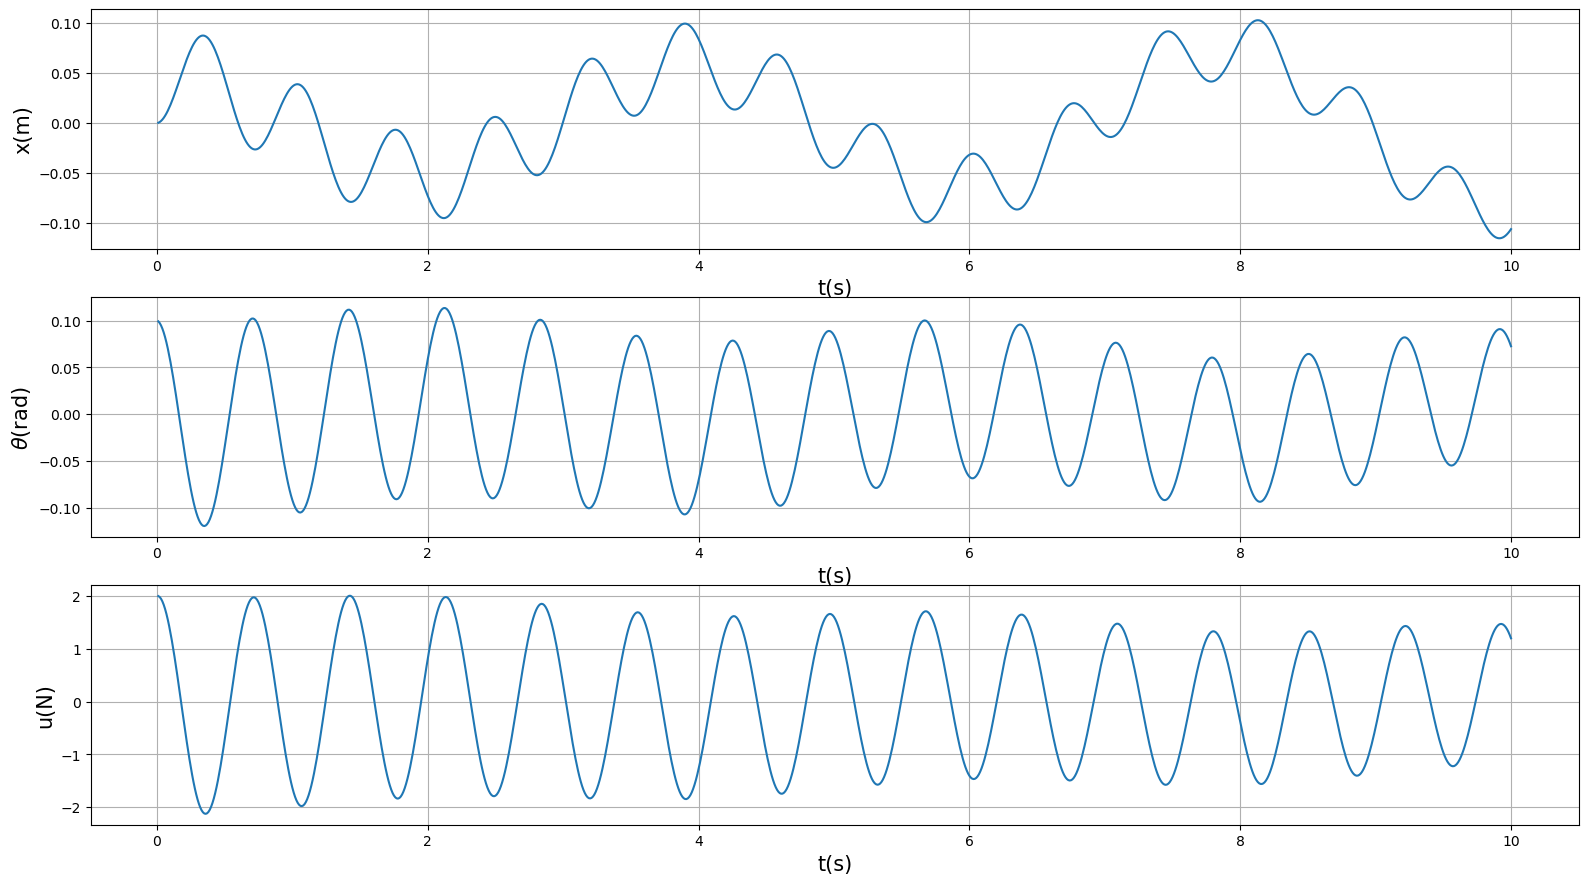

In [12]:
controller = PID(20,3,-0.01,0.0008,0,0)
pendulo = sistemaPendulo(0,0,0.1,0,controller.calculateForce, tstep)
fig, ax = plt.subplots(3,figsize=(19.20,10.80),dpi=100)
tmpv = []
for i in range(0,1000):
    tmpv.append(next(pendulo))
ax[0].plot([aux[7] for aux in tmpv],[aux[0] for aux in tmpv])
ax[1].plot([aux[7] for aux in tmpv],[aux[3] for aux in tmpv])
ax[2].plot([aux[7] for aux in tmpv],[aux[6] for aux in tmpv])
ax[0].set_ylabel("x(m)",size=15)
ax[0].set_xlabel("t(s)",size=15)
ax[1].set_ylabel(r'$\theta$(rad)',size = 15)
ax[1].set_xlabel("t(s)",size=15)
ax[2].set_ylabel("u(N)",size=15)
ax[2].set_xlabel("t(s)",size=15)
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.savefig("../images/controladorPI_C.png")

# Controlador PID

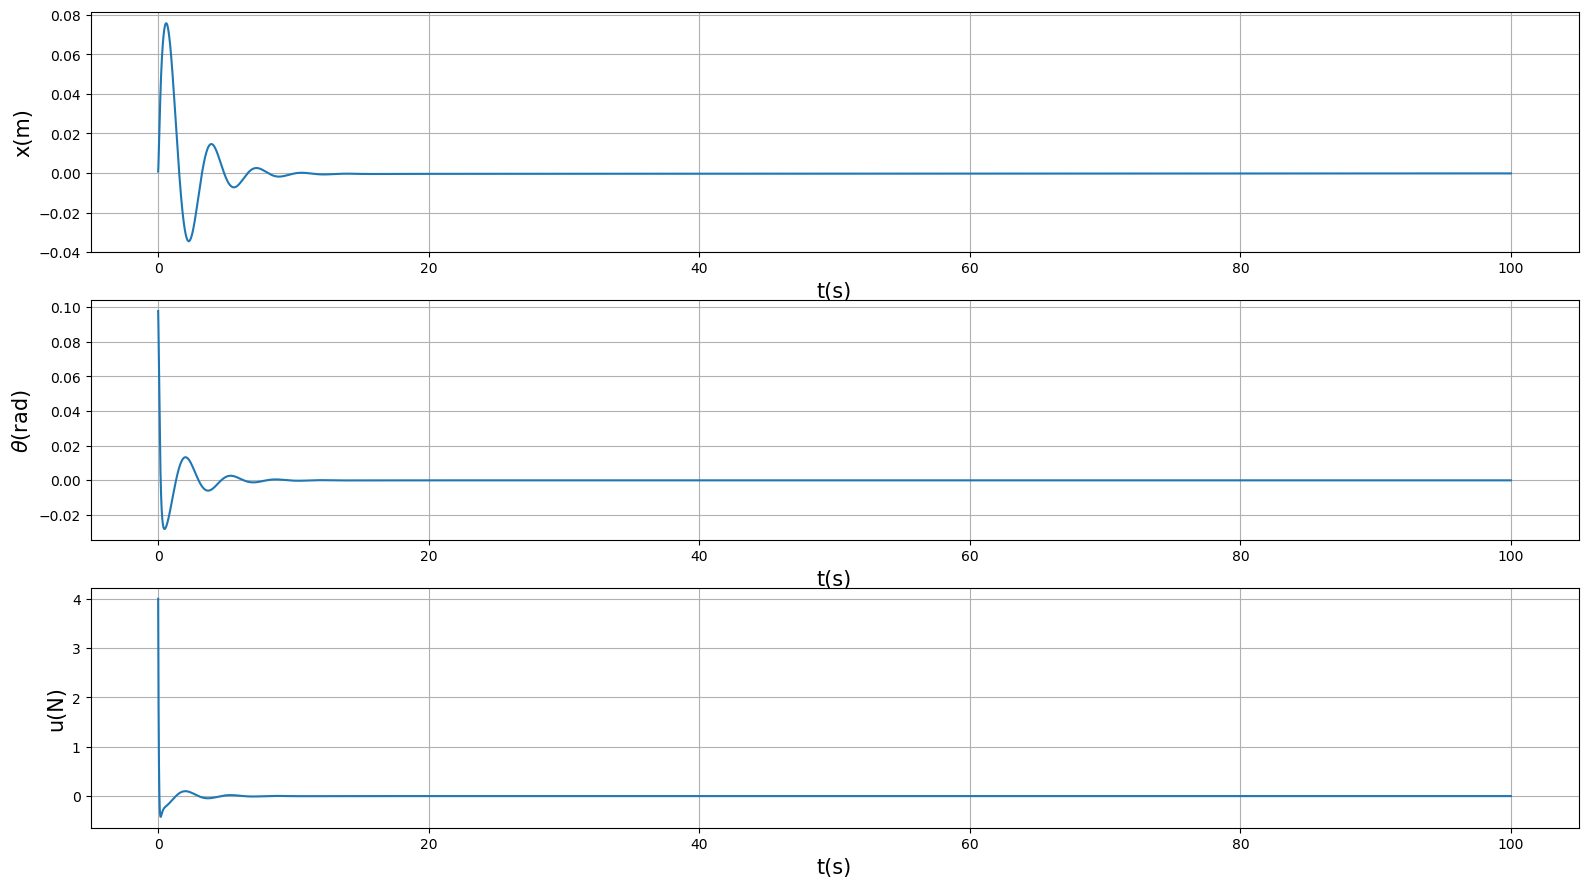

In [13]:
controller = PID(40,10,0.00,0.001,5,4)
pendulo = sistemaPendulo(0,0,0.1,0,controller.calculateForce, tstep)
fig, ax = plt.subplots(3,figsize=(19.20,10.80),dpi=100)
tmpv = []
for i in range(0,10000):
    tmpv.append(next(pendulo))
ax[0].plot([aux[7] for aux in tmpv],[aux[0] for aux in tmpv])
ax[1].plot([aux[7] for aux in tmpv],[aux[3] for aux in tmpv])
ax[2].plot([aux[7] for aux in tmpv],[aux[6] for aux in tmpv])
ax[0].set_ylabel("x(m)",size=15)
ax[0].set_xlabel("t(s)",size=15)
ax[1].set_ylabel(r'$\theta$(rad)',size = 15)
ax[1].set_xlabel("t(s)",size=15)
ax[2].set_ylabel("u(N)",size=15)
ax[2].set_xlabel("t(s)",size=15)
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.savefig("../images/controladorPID_C.png")

# Mapa de respostas do controlador PID

controller = PID(40,10,0.00,0.001,5,4)
controller.calculateForce(0,0,0.1,0)
plt.figure(figsize=(15,15))
total = []
for theta in np.linspace(-np.pi,np.pi,100):
    row = []
    for dtheta in np.linspace(-10,10,100):
        row.append(controller.calculateForce(0,theta,0,dtheta))
    total.append(row)
total = np.array(total)
ax = sb.heatmap(total,cmap="hot")
ax.invert_yaxis()
plt.savefig("../images/heatmapPID_C.png")

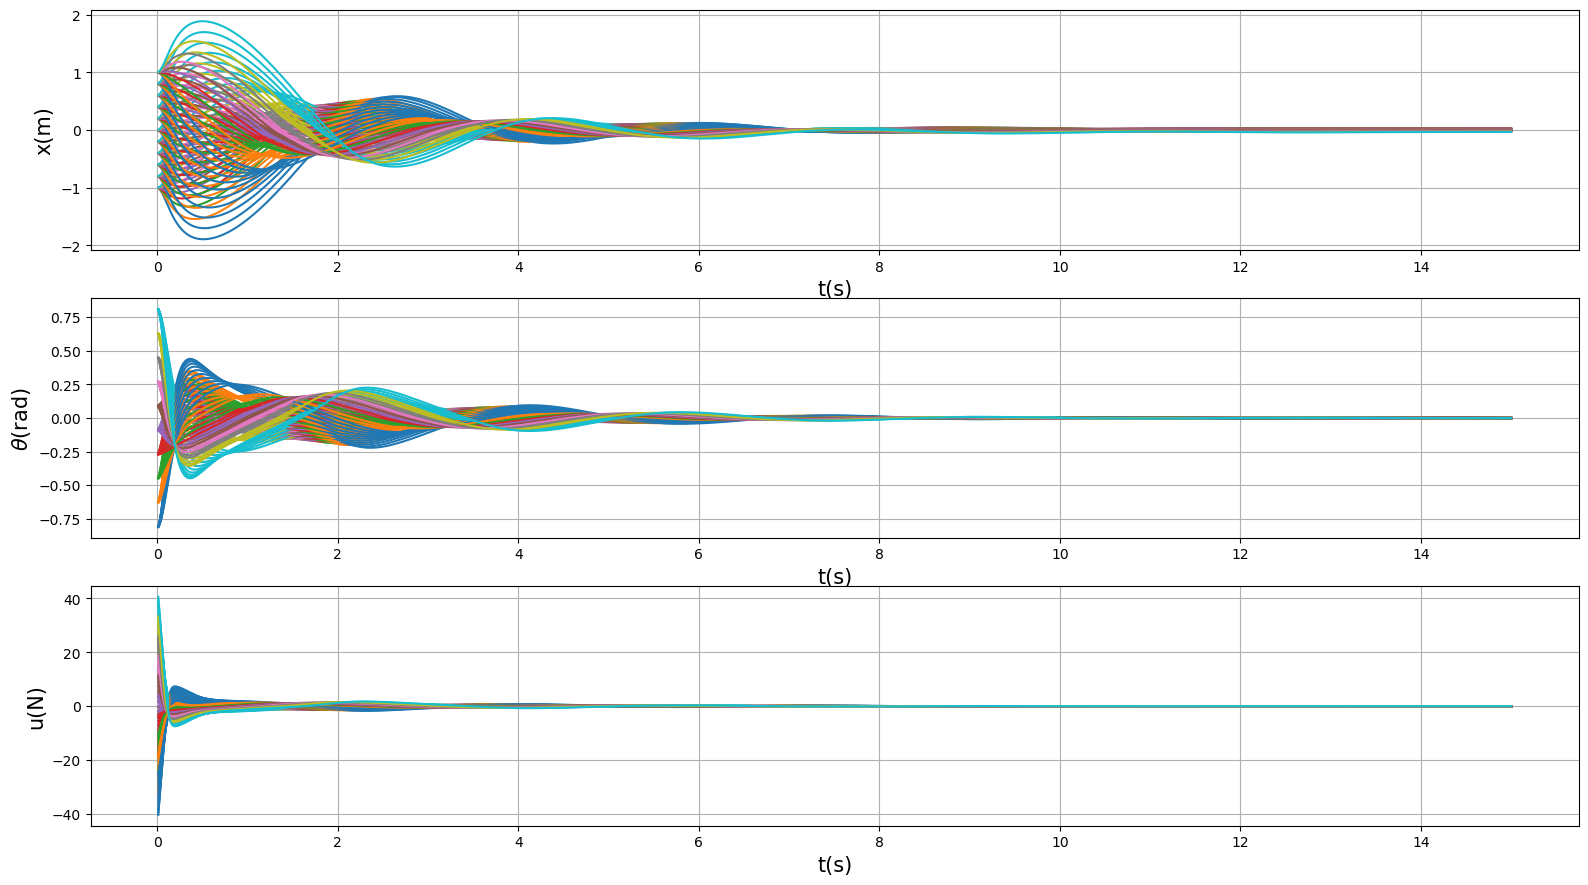

In [14]:
controller = PID(40,10,0.00,0.001,5,4)
tmpv = []
printFlag = True
maxAngle = 2
fig, ax = plt.subplots(3,figsize=(19.20,10.80),dpi=100)
for k in range (0,11):
    for j in range (1,11):
        initialAngle = j*maxAngle/11
        pendulo = sistemaPendulo(k*0.2-1,0,initialAngle-1,0,controller.calculateForce, tstep) 
        if printFlag: tmpv2 = []
        for i in range(0,1500):
            nextPendulo = next(pendulo)
            if printFlag: tmpv2.append(nextPendulo)
            tmpv.append(nextPendulo)
        if printFlag: 
            ax[0].plot([aux[7] for aux in tmpv2],[aux[0] for aux in tmpv2])
            ax[1].plot([aux[7] for aux in tmpv2],[aux[3] for aux in tmpv2])
            ax[2].plot([aux[7] for aux in tmpv2],[aux[6] for aux in tmpv2])
if printFlag:
    ax[0].set_ylabel("x(m)",size=15)
    ax[0].set_xlabel("t(s)",size=15)
    ax[1].set_ylabel(r'$\theta$(rad)',size = 15)
    ax[1].set_xlabel("t(s)",size=15)
    ax[2].set_ylabel("u(N)",size=15)
    ax[2].set_xlabel("t(s)",size=15)
    ax[0].grid()
    ax[1].grid()
    ax[2].grid()
plt.savefig("../images/PIDresponse.png")
states = pd.DataFrame(tmpv, columns=["x","v","a","theta","dtheta","ddtheta","controlForce","t"])

In [15]:
states

x         v          a     theta    dtheta     ddtheta  \
0      -1.006490 -0.648998 -64.899764 -0.805781  1.240061  124.006122   
1      -1.018833 -1.234320 -58.532246 -0.782227  2.355385  111.532420   
2      -1.036415 -1.758195 -52.387534 -0.748591  3.363591  100.820549   
3      -1.058622 -2.220697 -46.250112 -0.705886  4.270534   90.694350   
4      -1.084828 -2.620618 -39.992158 -0.655157  5.072924   80.238944   
...          ...       ...        ...       ...       ...         ...   
164995 -0.033123 -0.002164  -0.001706 -0.000173  0.001020   -0.000299   
164996 -0.033144 -0.002180  -0.001596 -0.000163  0.001016   -0.000335   
164997 -0.033166 -0.002195  -0.001485 -0.000153  0.001013   -0.000370   
164998 -0.033188 -0.002209  -0.001376 -0.000143  0.001008   -0.000404   
164999 -0.033211 -0.002221  -0.001267 -0.000132  0.001004   -0.000438   

        controlForce      t  
0         -40.343976   0.01  
1         -36.271522   0.02  
2         -32.145651   0.03  
3         -27.926242   0.04  
4         -23.620774   0.05  
...              ...    ...  
164995     -0.001212  14.96  
164996     -0.001137  14.97  
164997     -0.001062  14.98  
164998     -0.000987  14.99  
164999     -0.000913  15.00  

[165000 rows x 8 columns]

In [16]:
states_no_a = states[["x","theta","v","dtheta","controlForce"]]
states_no_a

x     theta         v    dtheta  controlForce
0      -1.006490 -0.805781 -0.648998  1.240061    -40.343976
1      -1.018833 -0.782227 -1.234320  2.355385    -36.271522
2      -1.036415 -0.748591 -1.758195  3.363591    -32.145651
3      -1.058622 -0.705886 -2.220697  4.270534    -27.926242
4      -1.084828 -0.655157 -2.620618  5.072924    -23.620774
...          ...       ...       ...       ...           ...
164995 -0.033123 -0.000173 -0.002164  0.001020     -0.001212
164996 -0.033144 -0.000163 -0.002180  0.001016     -0.001137
164997 -0.033166 -0.000153 -0.002195  0.001013     -0.001062
164998 -0.033188 -0.000143 -0.002209  0.001008     -0.000987
164999 -0.033211 -0.000132 -0.002221  0.001004     -0.000913

[165000 rows x 5 columns]

In [17]:
inputLayer = tf.keras.layers.Input(shape=(4,))
hiddenLayer_1 = tf.keras.layers.Dense(200,activation="relu")(inputLayer)
hiddenLayer_2 = tf.keras.layers.Dense(200,activation="relu")(hiddenLayer_1)
outputLayer = tf.keras.layers.Dense(1,activation = "linear")(hiddenLayer_2)
neuralController = tf.keras.Model(inputs=[inputLayer],outputs=[outputLayer])
neuralController.compile(loss="mse",metrics=["mse"],optimizer=tf.keras.optimizers.Adam(learning_rate=0.000005))

#tf.keras.utils.plot_model(neuralController)

In [18]:
X_train = np.array(states_no_a.values[:,:-1])
Y_train = np.array(states_no_a.values[:,-1])

In [19]:
history_cache = neuralController.fit(X_train,Y_train,batch_size=1000,epochs=3000,validation_split=0.05,verbose=1,shuffle=1)

Train on 156750 samples, validate on 8250 samples
Epoch 1/3000
156750/156750 [==============================] - 1s 10us/sample - loss: 1.3327 - mse: 1.3327 - val_loss: 2.0175 - val_mse: 2.0175
Epoch 2/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.3154 - mse: 1.3154 - val_loss: 1.9947 - val_mse: 1.9947
Epoch 3/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.2988 - mse: 1.2988 - val_loss: 1.9727 - val_mse: 1.9727
Epoch 4/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.2824 - mse: 1.2824 - val_loss: 1.9511 - val_mse: 1.9511
Epoch 5/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.2659 - mse: 1.2659 - val_loss: 1.9285 - val_mse: 1.9285
Epoch 6/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.2493 - mse: 1.2493 - val_loss: 1.9052 - val_mse: 1.9052
Epoch 7/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.2327 - mse:

Epoch 58/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8629 - mse: 0.8629 - val_loss: 1.4171 - val_mse: 1.4171
Epoch 59/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8600 - mse: 0.8600 - val_loss: 1.4130 - val_mse: 1.4130
Epoch 60/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8571 - mse: 0.8571 - val_loss: 1.4093 - val_mse: 1.4093
Epoch 61/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8542 - mse: 0.8542 - val_loss: 1.4056 - val_mse: 1.4056
Epoch 62/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8513 - mse: 0.8513 - val_loss: 1.4026 - val_mse: 1.4026
Epoch 63/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8483 - mse: 0.8483 - val_loss: 1.3987 - val_mse: 1.3987
Epoch 64/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8454 - mse: 0.8454 - val_loss: 1.3947 - val_mse: 1.3947

Epoch 172/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.4577 - mse: 0.4577 - val_loss: 0.8109 - val_mse: 0.8109
Epoch 173/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.4535 - mse: 0.4535 - val_loss: 0.8044 - val_mse: 0.8044
Epoch 174/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.4494 - mse: 0.4494 - val_loss: 0.7972 - val_mse: 0.7972
Epoch 175/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.4452 - mse: 0.4452 - val_loss: 0.7904 - val_mse: 0.7904
Epoch 176/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.4410 - mse: 0.4410 - val_loss: 0.7828 - val_mse: 0.7828
Epoch 177/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.4369 - mse: 0.4369 - val_loss: 0.7767 - val_mse: 0.7767
Epoch 178/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.4327 - mse: 0.4327 - val_loss: 0.7690 - val_mse:

Epoch 229/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.2328 - mse: 0.2328 - val_loss: 0.4470 - val_mse: 0.4470
Epoch 230/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.2295 - mse: 0.2295 - val_loss: 0.4423 - val_mse: 0.4423
Epoch 231/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.2260 - mse: 0.2260 - val_loss: 0.4372 - val_mse: 0.4372
Epoch 232/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.2226 - mse: 0.2226 - val_loss: 0.4318 - val_mse: 0.4318
Epoch 233/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.2192 - mse: 0.2192 - val_loss: 0.4279 - val_mse: 0.4279
Epoch 234/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.2159 - mse: 0.2159 - val_loss: 0.4222 - val_mse: 0.4222
Epoch 235/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.2126 - mse: 0.2126 - val_loss: 0.4174 - val_mse:

Epoch 286/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0856 - mse: 0.0856 - val_loss: 0.2366 - val_mse: 0.2366
Epoch 287/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0841 - mse: 0.0841 - val_loss: 0.2350 - val_mse: 0.2350
Epoch 288/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0825 - mse: 0.0825 - val_loss: 0.2323 - val_mse: 0.2323
Epoch 289/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0811 - mse: 0.0811 - val_loss: 0.2314 - val_mse: 0.2314
Epoch 290/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0797 - mse: 0.0797 - val_loss: 0.2293 - val_mse: 0.2293
Epoch 291/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0783 - mse: 0.0783 - val_loss: 0.2274 - val_mse: 0.2274
Epoch 292/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0769 - mse: 0.0769 - val_loss: 0.2244 - val_mse:

Epoch 343/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0384 - mse: 0.0384 - val_loss: 0.1577 - val_mse: 0.1577
Epoch 344/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0380 - mse: 0.0380 - val_loss: 0.1580 - val_mse: 0.1580
Epoch 345/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0376 - mse: 0.0376 - val_loss: 0.1567 - val_mse: 0.1567
Epoch 346/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0372 - mse: 0.0372 - val_loss: 0.1571 - val_mse: 0.1571
Epoch 347/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0368 - mse: 0.0368 - val_loss: 0.1559 - val_mse: 0.1559
Epoch 348/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0364 - mse: 0.0364 - val_loss: 0.1543 - val_mse: 0.1543
Epoch 349/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0360 - mse: 0.0360 - val_loss: 0.1538 - val_mse:

Epoch 400/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0226 - mse: 0.0226 - val_loss: 0.1111 - val_mse: 0.1111
Epoch 401/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0224 - mse: 0.0224 - val_loss: 0.1096 - val_mse: 0.1096
Epoch 402/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0222 - mse: 0.0222 - val_loss: 0.1106 - val_mse: 0.1106
Epoch 403/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0220 - mse: 0.0220 - val_loss: 0.1069 - val_mse: 0.1069
Epoch 404/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0219 - mse: 0.0219 - val_loss: 0.1066 - val_mse: 0.1066
Epoch 405/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0217 - mse: 0.0217 - val_loss: 0.1077 - val_mse: 0.1077
Epoch 406/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0215 - mse: 0.0215 - val_loss: 0.1069 - val_mse:

Epoch 457/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0784 - val_mse: 0.0784
Epoch 458/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0774 - val_mse: 0.0774
Epoch 459/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0769 - val_mse: 0.0769
Epoch 460/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0756 - val_mse: 0.0756
Epoch 461/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0764 - val_mse: 0.0764
Epoch 462/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0768 - val_mse: 0.0768
Epoch 463/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0753 - val_mse:

Epoch 514/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0572 - val_mse: 0.0572
Epoch 515/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0556 - val_mse: 0.0556
Epoch 516/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0558 - val_mse: 0.0558
Epoch 517/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0541 - val_mse: 0.0541
Epoch 518/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0549 - val_mse: 0.0549
Epoch 519/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0544 - val_mse: 0.0544
Epoch 520/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0541 - val_mse:

Epoch 571/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0406 - val_mse: 0.0406
Epoch 572/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0406 - val_mse: 0.0406
Epoch 573/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0404 - val_mse: 0.0404
Epoch 574/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 575/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0401 - val_mse: 0.0401
Epoch 576/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0382 - val_mse: 0.0382
Epoch 577/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0401 - val_mse:

Epoch 628/3000
156750/156750 [==============================] - 0s 3us/sample - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 629/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 630/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 631/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 632/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 633/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 634/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0289 - val_mse:

Epoch 685/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 686/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 687/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 688/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 689/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 690/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 691/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0223 - val_mse:

Epoch 742/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 743/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 744/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 745/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 746/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 747/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 748/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0186 - val_mse:

Epoch 799/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 800/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 801/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 802/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 803/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 804/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 805/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0152 - val_mse:

Epoch 856/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 857/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 858/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 859/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 860/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 861/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 862/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0127 - val_mse:

Epoch 913/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 914/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 915/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 916/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 917/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 918/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 919/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0104 - val_mse:

Epoch 970/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 971/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 972/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 973/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 974/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 975/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 976/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0088 - val_mse:

Epoch 1027/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1028/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 1029/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1030/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 1031/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1032/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 1033/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0082 - v

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 1140/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 1141/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 1142/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 1143/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 1144/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 1145/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0065 - val_mse: 0.0065
E

156750/156750 [==============================] - 0s 2us/sample - loss: 9.9829e-04 - mse: 9.9829e-04 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 1252/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 9.9458e-04 - mse: 9.9458e-04 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1253/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 9.9147e-04 - mse: 9.9147e-04 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 1254/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 9.9227e-04 - mse: 9.9227e-04 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1255/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 9.9229e-04 - mse: 9.9229e-04 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 1256/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 9.8876e-04 - mse: 9.8876e-04 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 1257/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 9.8720e-04 

156750/156750 [==============================] - 0s 2us/sample - loss: 8.4349e-04 - mse: 8.4349e-04 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1358/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 8.3895e-04 - mse: 8.3895e-04 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 1359/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 8.3876e-04 - mse: 8.3876e-04 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1360/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 8.4002e-04 - mse: 8.4002e-04 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1361/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 8.3566e-04 - mse: 8.3566e-04 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1362/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 8.3566e-04 - mse: 8.3566e-04 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 1363/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 8.3526e-04 

156750/156750 [==============================] - 0s 2us/sample - loss: 7.2133e-04 - mse: 7.2133e-04 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1464/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 7.2037e-04 - mse: 7.2037e-04 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 1465/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 7.1861e-04 - mse: 7.1861e-04 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1466/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 7.1653e-04 - mse: 7.1653e-04 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 1467/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 7.1583e-04 - mse: 7.1583e-04 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1468/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 7.1734e-04 - mse: 7.1734e-04 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 1469/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 7.1499e-04 

156750/156750 [==============================] - 0s 2us/sample - loss: 6.1834e-04 - mse: 6.1834e-04 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 1570/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 6.1765e-04 - mse: 6.1765e-04 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 1571/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 6.1866e-04 - mse: 6.1866e-04 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 1572/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 6.1522e-04 - mse: 6.1522e-04 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 1573/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 6.1375e-04 - mse: 6.1375e-04 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 1574/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 6.1475e-04 - mse: 6.1475e-04 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 1575/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 6.1191e-04 

156750/156750 [==============================] - 0s 2us/sample - loss: 5.3446e-04 - mse: 5.3446e-04 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 1676/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 5.3393e-04 - mse: 5.3393e-04 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1677/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 5.3414e-04 - mse: 5.3414e-04 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1678/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 5.3242e-04 - mse: 5.3242e-04 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 1679/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 5.3293e-04 - mse: 5.3293e-04 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 1680/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 5.2933e-04 - mse: 5.2933e-04 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 1681/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 5.2856e-04 

156750/156750 [==============================] - 0s 2us/sample - loss: 4.6864e-04 - mse: 4.6864e-04 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1782/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 4.6679e-04 - mse: 4.6679e-04 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1783/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 4.6617e-04 - mse: 4.6617e-04 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1784/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 4.6566e-04 - mse: 4.6566e-04 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 1785/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 4.6566e-04 - mse: 4.6566e-04 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1786/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 4.6384e-04 - mse: 4.6384e-04 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1787/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 4.6434e-04 

156750/156750 [==============================] - 0s 2us/sample - loss: 4.1196e-04 - mse: 4.1196e-04 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 1888/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 4.1302e-04 - mse: 4.1302e-04 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1889/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 4.1169e-04 - mse: 4.1169e-04 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1890/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 4.1194e-04 - mse: 4.1194e-04 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1891/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 4.1111e-04 - mse: 4.1111e-04 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1892/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 4.1142e-04 - mse: 4.1142e-04 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 1893/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 4.1248e-04 

156750/156750 [==============================] - 0s 2us/sample - loss: 3.6791e-04 - mse: 3.6791e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1994/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 3.6626e-04 - mse: 3.6626e-04 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1995/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 3.6693e-04 - mse: 3.6693e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1996/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 3.6635e-04 - mse: 3.6635e-04 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1997/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 3.6659e-04 - mse: 3.6659e-04 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1998/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 3.6541e-04 - mse: 3.6541e-04 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1999/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 3.6575e-04 

156750/156750 [==============================] - 0s 2us/sample - loss: 3.2859e-04 - mse: 3.2859e-04 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2100/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 3.2970e-04 - mse: 3.2970e-04 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2101/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 3.2925e-04 - mse: 3.2925e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 2102/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 3.2953e-04 - mse: 3.2953e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 2103/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 3.2805e-04 - mse: 3.2805e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 2104/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 3.2876e-04 - mse: 3.2876e-04 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2105/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 3.2770e-04 

156750/156750 [==============================] - 0s 2us/sample - loss: 2.9919e-04 - mse: 2.9919e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 2206/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.9764e-04 - mse: 2.9764e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 2207/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.9762e-04 - mse: 2.9762e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 2208/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.9634e-04 - mse: 2.9634e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 2209/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.9687e-04 - mse: 2.9687e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 2210/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.9685e-04 - mse: 2.9685e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 2211/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.9618e-04 

156750/156750 [==============================] - 0s 2us/sample - loss: 2.7175e-04 - mse: 2.7175e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2312/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.7004e-04 - mse: 2.7004e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2313/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.7141e-04 - mse: 2.7141e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 2314/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.7110e-04 - mse: 2.7110e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 2315/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.7007e-04 - mse: 2.7007e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 2316/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.6913e-04 - mse: 2.6913e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 2317/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.7002e-04 

156750/156750 [==============================] - 0s 2us/sample - loss: 2.4791e-04 - mse: 2.4791e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 2418/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.4827e-04 - mse: 2.4827e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2419/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.4838e-04 - mse: 2.4838e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 2420/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.4809e-04 - mse: 2.4809e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2421/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.4721e-04 - mse: 2.4721e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 2422/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.4767e-04 - mse: 2.4767e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2423/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.4744e-04 

156750/156750 [==============================] - 0s 2us/sample - loss: 2.2819e-04 - mse: 2.2819e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 2524/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.3084e-04 - mse: 2.3084e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 2525/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.2852e-04 - mse: 2.2852e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2526/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.2782e-04 - mse: 2.2782e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2527/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.2870e-04 - mse: 2.2870e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2528/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.2792e-04 - mse: 2.2792e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2529/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.2812e-04 

156750/156750 [==============================] - 0s 2us/sample - loss: 2.1079e-04 - mse: 2.1079e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 2630/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.1096e-04 - mse: 2.1096e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2631/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.1120e-04 - mse: 2.1120e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 2632/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.1088e-04 - mse: 2.1088e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2633/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.1065e-04 - mse: 2.1065e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 2634/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.1027e-04 - mse: 2.1027e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2635/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 2.1042e-04 

156750/156750 [==============================] - 0s 2us/sample - loss: 1.9548e-04 - mse: 1.9548e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2736/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.9501e-04 - mse: 1.9501e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 2737/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.9510e-04 - mse: 1.9510e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2738/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.9554e-04 - mse: 1.9554e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 2739/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.9524e-04 - mse: 1.9524e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2740/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.9426e-04 - mse: 1.9426e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2741/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.9572e-04 

156750/156750 [==============================] - 0s 2us/sample - loss: 1.8447e-04 - mse: 1.8447e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2842/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.8194e-04 - mse: 1.8194e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 2843/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.8142e-04 - mse: 1.8142e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2844/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.8311e-04 - mse: 1.8311e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2845/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.8274e-04 - mse: 1.8274e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2846/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.8356e-04 - mse: 1.8356e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 2847/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.8197e-04 

156750/156750 [==============================] - 0s 2us/sample - loss: 1.7167e-04 - mse: 1.7167e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2948/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.7175e-04 - mse: 1.7175e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2949/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.7096e-04 - mse: 1.7096e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 2950/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.7201e-04 - mse: 1.7201e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 2951/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.7214e-04 - mse: 1.7214e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 2952/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.7104e-04 - mse: 1.7104e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 2953/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.7087e-04 

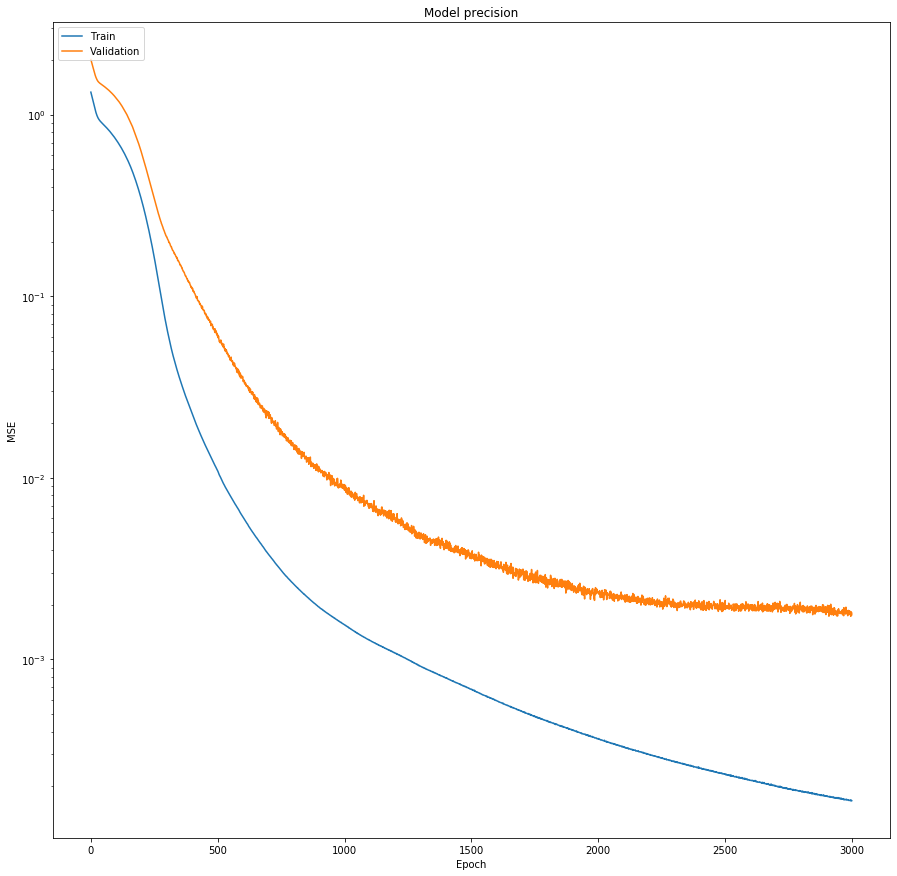

In [20]:
plt.figure(figsize=(15,15))
plt.plot(history_cache.history['mse'])
plt.plot(history_cache.history['val_mse'])
plt.title('Model precision')
plt.ylabel('MSE')
plt.yscale("log")
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.savefig("../images/NNtraining.png")

In [21]:
def neuralForce(xtmp,thetatmp,vtmp,dthetatmp):
    dataToProcess = np.array([xtmp,thetatmp,vtmp,dthetatmp]).reshape(1,4)
    return neuralController(dataToProcess,training=False)[0,0]

total = []
plt.figure(figsize=(15,15))
for theta in np.linspace(-np.pi,np.pi,100):
    row = []
    for dtheta in np.linspace(-10,10,100):
        row.append(neuralForce(0,0,theta,dtheta))
    total.append(row)
total = np.array(total)
ax = sb.heatmap(total,cmap="hot")
ax.invert_yaxis()
plt.savefig("../images/heatmapNN.png")

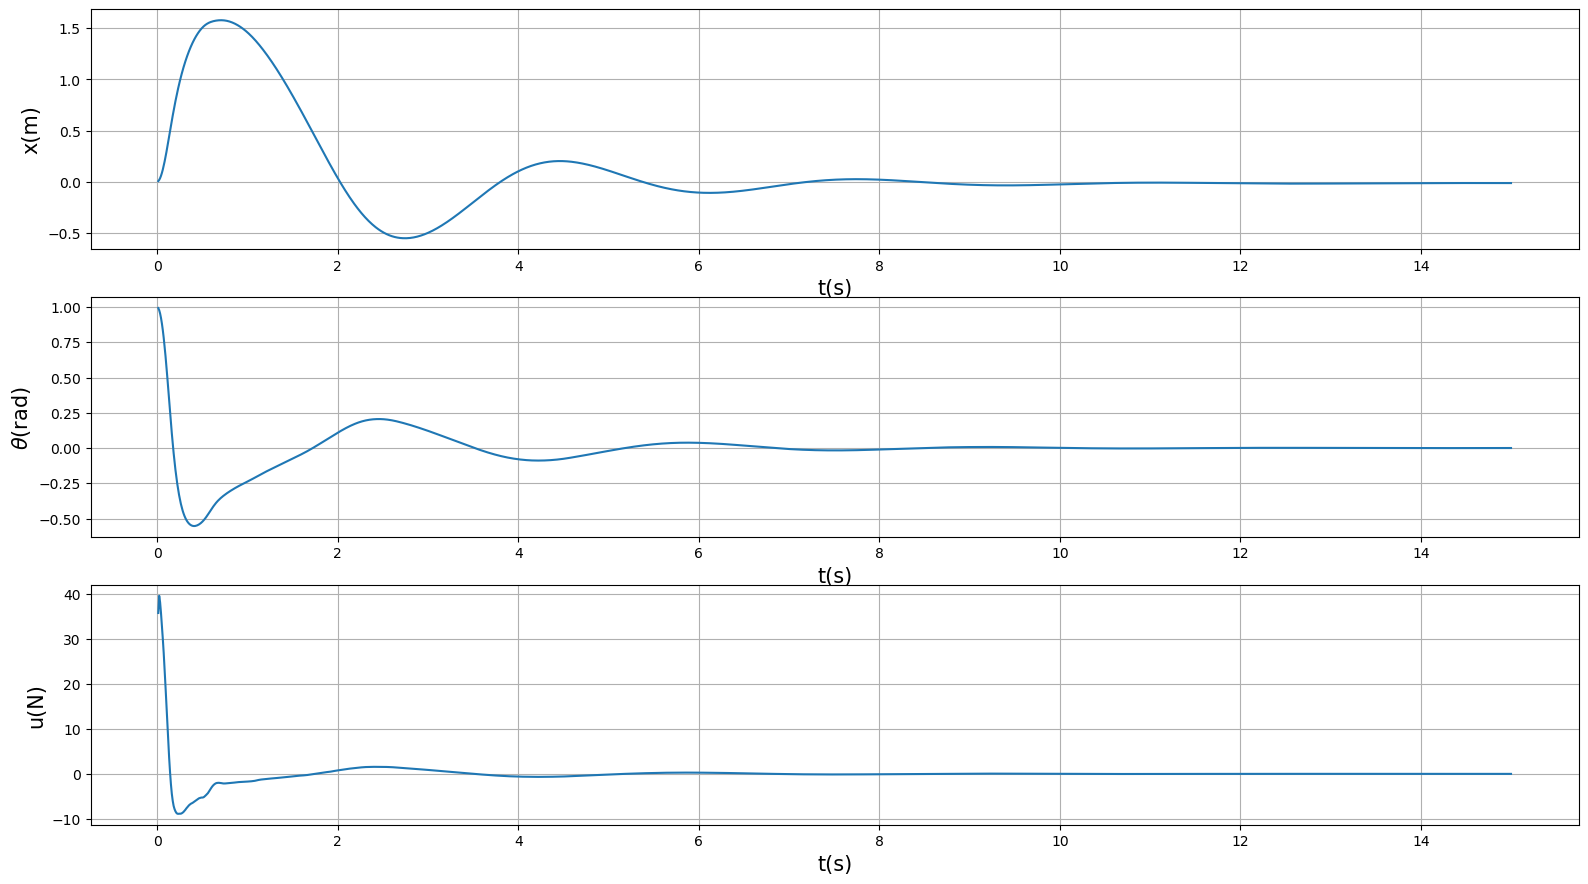

In [22]:
pendulo = sistemaPendulo(0,0,1,0,neuralForce, tstep)
fig, ax = plt.subplots(3,figsize=(19.20,10.80),dpi=100)
tmpv = []
for i in range(0,1500):
    tmpv.append(next(pendulo))
    #print(i)
ax[0].plot([aux[7] for aux in tmpv],[aux[0] for aux in tmpv])
ax[1].plot([aux[7] for aux in tmpv],[aux[3] for aux in tmpv])
ax[2].plot([aux[7] for aux in tmpv],[aux[6] for aux in tmpv])
ax[0].set_ylabel("x(m)",size=15)
ax[0].set_xlabel("t(s)",size=15)
ax[1].set_ylabel(r'$\theta$(rad)',size = 15)
ax[1].set_xlabel("t(s)",size=15)
ax[2].set_ylabel("u(N)",size=15)
ax[2].set_xlabel("t(s)",size=15)
ax[0].grid()
ax[1].grid()
ax[2].grid()
#plt.suptitle("Angulo inicial = 1 rad",size=20)
plt.savefig("../images/NNcontrol.png")


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



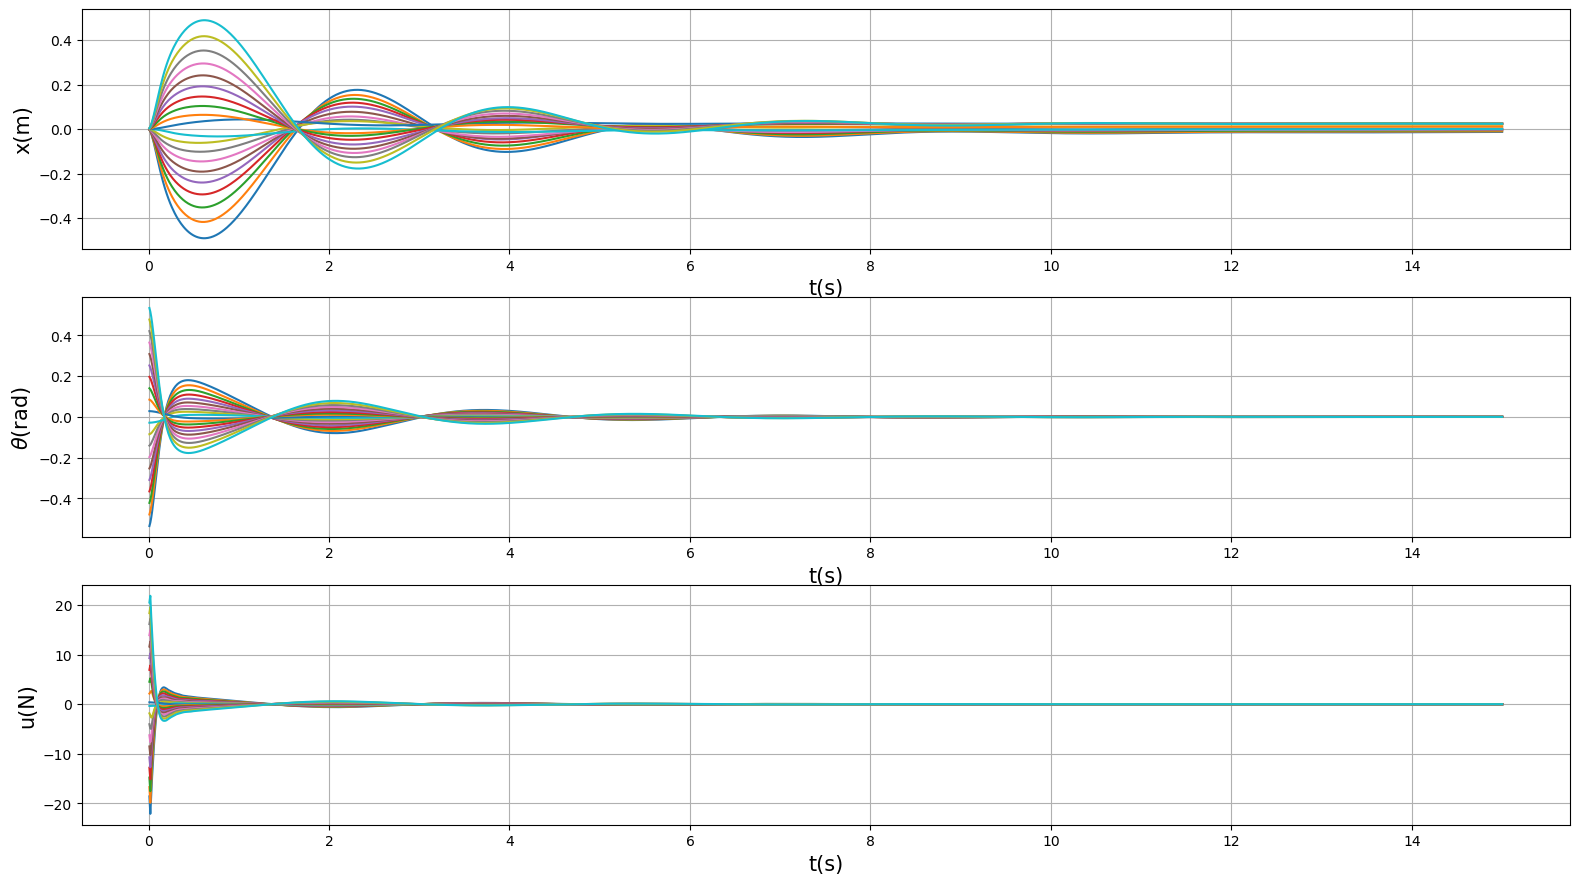

In [23]:
fig, ax = plt.subplots(3,figsize=(19.20,10.80),dpi=100)
for j in range(1,21):
    pendulo = sistemaPendulo(0,0,(j/21)*1.2-0.6,0,neuralForce, tstep)
    tmpv = []
    #print(j)
    for i in range(0,1500):
        tmpv.append(next(pendulo))
        #print(i)
    ax[0].plot([aux[7] for aux in tmpv],[aux[0] for aux in tmpv])
    ax[1].plot([aux[7] for aux in tmpv],[aux[3] for aux in tmpv])
    ax[2].plot([aux[7] for aux in tmpv],[aux[6] for aux in tmpv])
ax[0].set_ylabel("x(m)",size=15)
ax[0].set_xlabel("t(s)",size=15)
ax[1].set_ylabel(r'$\theta$(rad)',size = 15)
ax[1].set_xlabel("t(s)",size=15)
ax[2].set_ylabel("u(N)",size=15)
ax[2].set_xlabel("t(s)",size=15)
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.savefig("../images/NNcontrolAll.png")

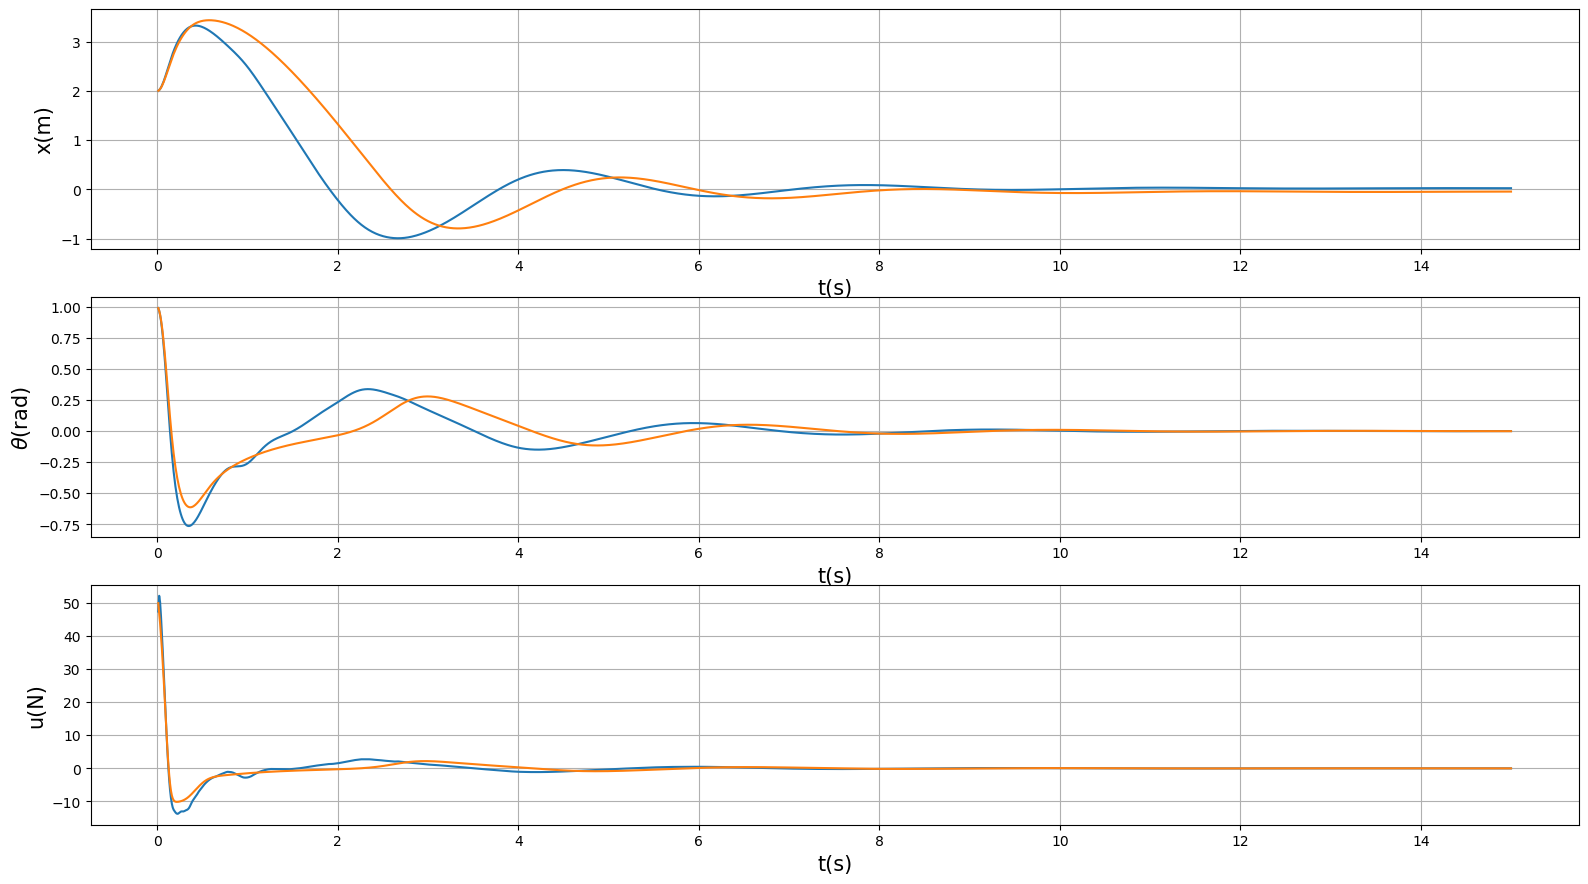

In [24]:
penduloNN = sistemaPendulo(2,0,1,0,neuralForce, tstep)
penduloPID = sistemaPendulo(2,0,1,0,controller.calculateForce, tstep)
fig, ax = plt.subplots(3,figsize=(19.20,10.80),dpi=100)
tmpvNN = []
tmpvPID = []
for i in range(0,1500):
    tmpvNN.append(next(penduloNN))
    tmpvPID.append(next(penduloPID))
    #print(i)
ax[0].plot([aux[7] for aux in tmpvNN],[aux[0] for aux in tmpvNN])
ax[1].plot([aux[7] for aux in tmpvNN],[aux[3] for aux in tmpvNN])
ax[2].plot([aux[7] for aux in tmpvNN],[aux[6] for aux in tmpvNN])
ax[0].plot([aux[7] for aux in tmpvPID],[aux[0] for aux in tmpvPID])
ax[1].plot([aux[7] for aux in tmpvPID],[aux[3] for aux in tmpvPID])
ax[2].plot([aux[7] for aux in tmpvPID],[aux[6] for aux in tmpvPID])
ax[0].set_ylabel("x(m)",size=15)
ax[0].set_xlabel("t(s)",size=15)
ax[1].set_ylabel(r'$\theta$(rad)',size = 15)
ax[1].set_xlabel("t(s)",size=15)
ax[2].set_ylabel("u(N)",size=15)
ax[2].set_xlabel("t(s)",size=15)
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.savefig("../images/controlCompare01.png")

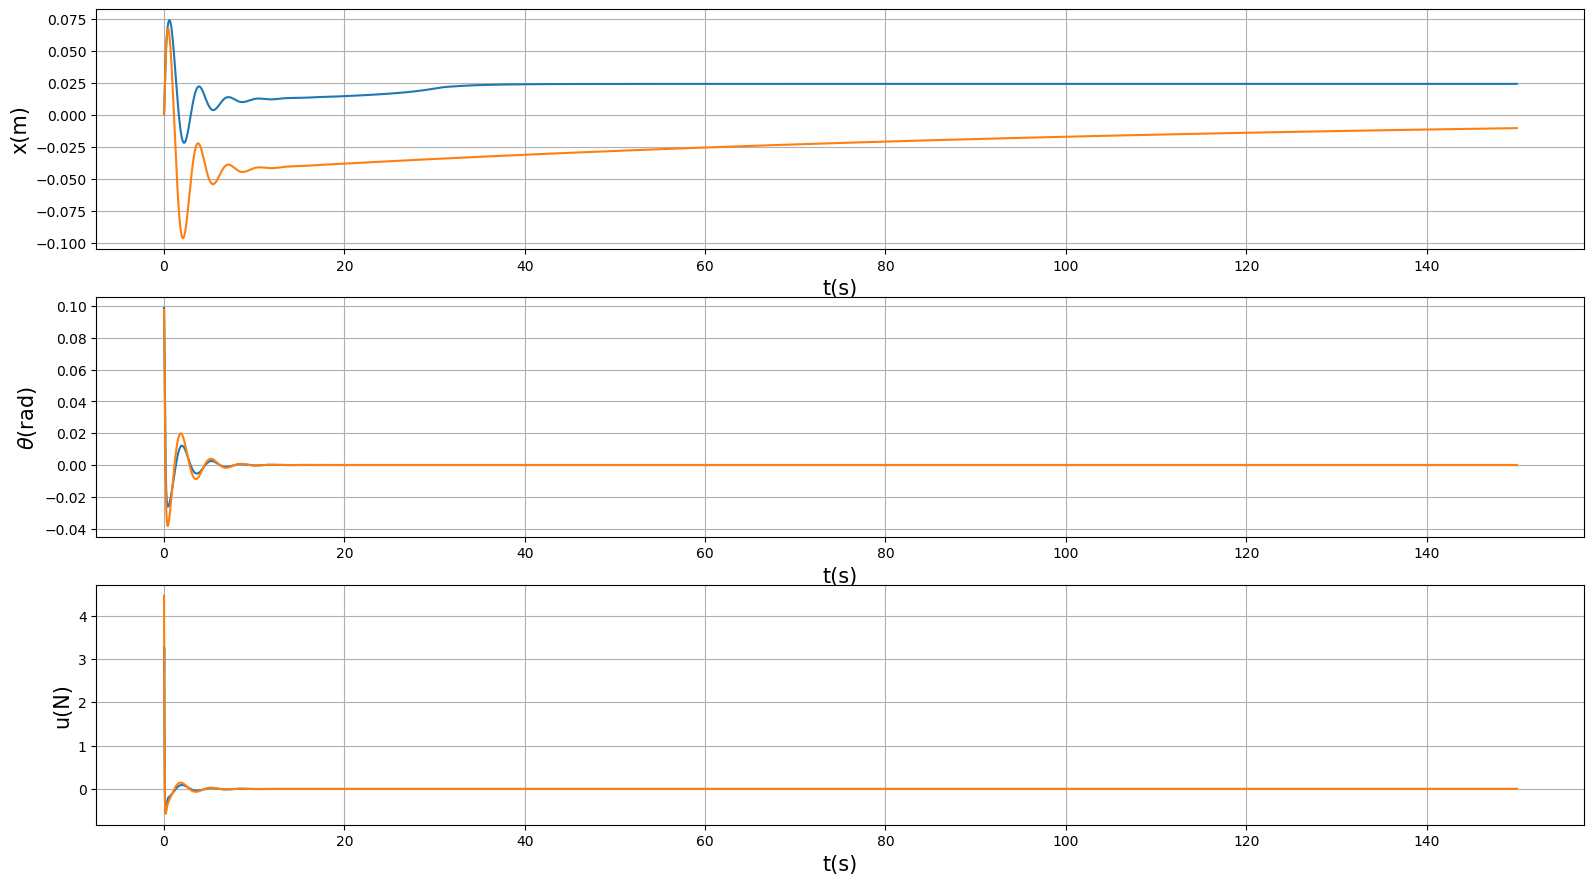

In [25]:
penduloNN = sistemaPendulo(0,0,0.1,0,neuralForce, tstep)
penduloPID = sistemaPendulo(0,0,0.1,0,controller.calculateForce, tstep)
fig, ax = plt.subplots(3,figsize=(19.20,10.80),dpi=100)
tmpvNN = []
tmpvPID = []
for i in range(0,15000):
    tmpvNN.append(next(penduloNN))
    tmpvPID.append(next(penduloPID))
    #print(i)
ax[0].plot([aux[7] for aux in tmpvNN],[aux[0] for aux in tmpvNN])
ax[1].plot([aux[7] for aux in tmpvNN],[aux[3] for aux in tmpvNN])
ax[2].plot([aux[7] for aux in tmpvNN],[aux[6] for aux in tmpvNN])
ax[0].plot([aux[7] for aux in tmpvPID],[aux[0] for aux in tmpvPID])
ax[1].plot([aux[7] for aux in tmpvPID],[aux[3] for aux in tmpvPID])
ax[2].plot([aux[7] for aux in tmpvPID],[aux[6] for aux in tmpvPID])
ax[0].set_ylabel("x(m)",size=15)
ax[0].set_xlabel("t(s)",size=15)
ax[1].set_ylabel(r'$\theta$(rad)',size = 15)
ax[1].set_xlabel("t(s)",size=15)
ax[2].set_ylabel("u(N)",size=15)
ax[2].set_xlabel("t(s)",size=15)
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.savefig("../images/controlCompare02.png")

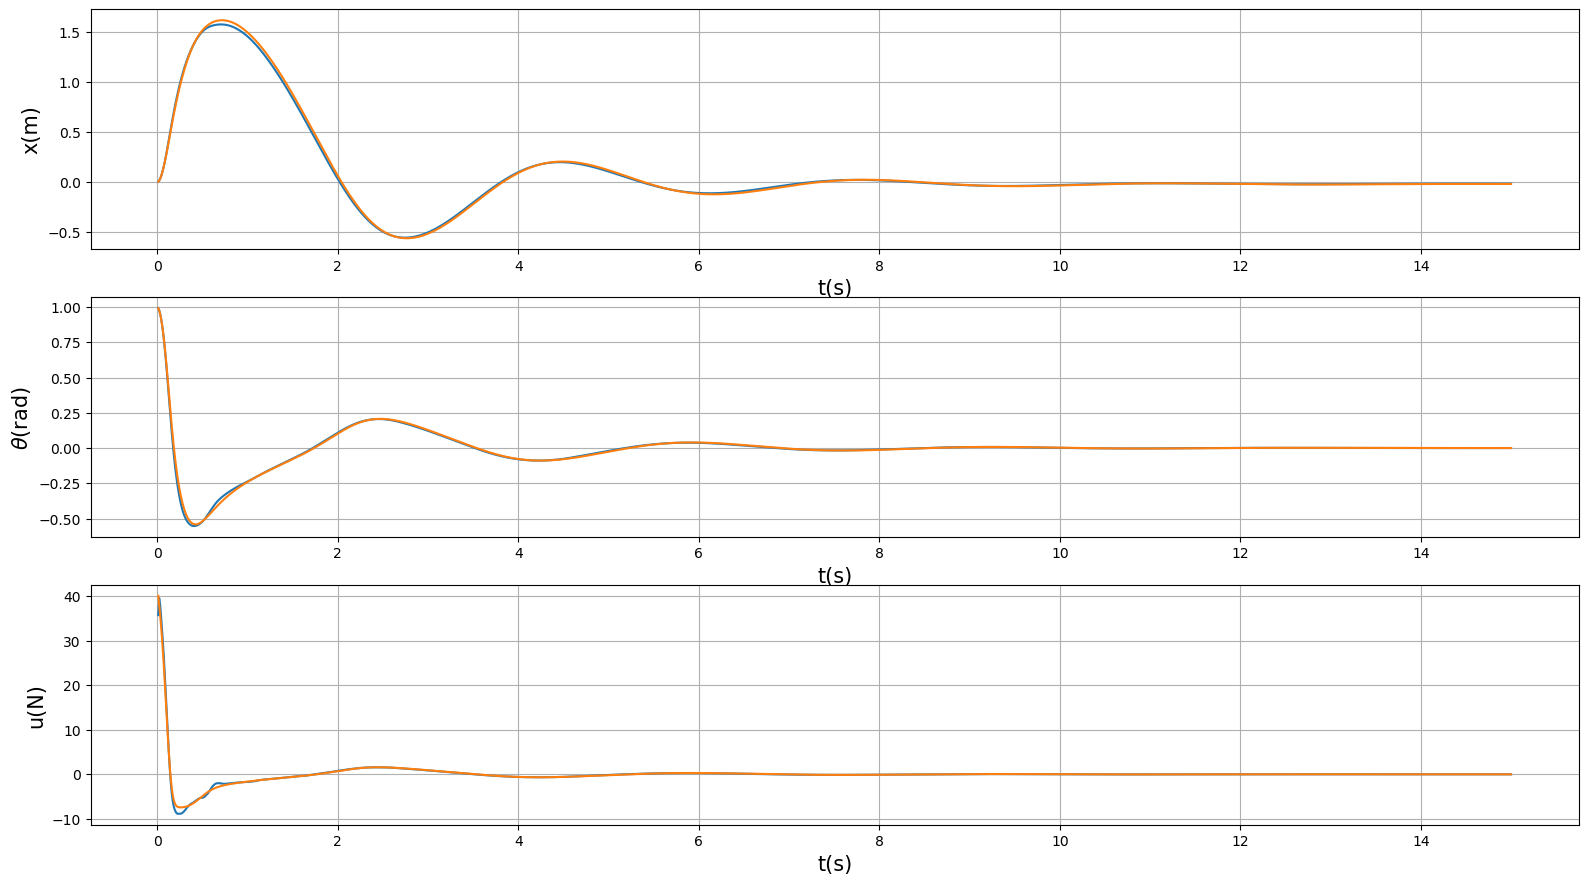

In [26]:
penduloNN = sistemaPendulo(0,0,1,0,neuralForce, tstep)
penduloPID = sistemaPendulo(0,0,1,0,controller.calculateForce, tstep)
fig, ax = plt.subplots(3,figsize=(19.20,10.80),dpi=100)
tmpvNN = []
tmpvPID = []
for i in range(0,1500):
    tmpvNN.append(next(penduloNN))
    tmpvPID.append(next(penduloPID))
    #print(i)
ax[0].plot([aux[7] for aux in tmpvNN],[aux[0] for aux in tmpvNN])
ax[1].plot([aux[7] for aux in tmpvNN],[aux[3] for aux in tmpvNN])
ax[2].plot([aux[7] for aux in tmpvNN],[aux[6] for aux in tmpvNN])
ax[0].plot([aux[7] for aux in tmpvPID],[aux[0] for aux in tmpvPID])
ax[1].plot([aux[7] for aux in tmpvPID],[aux[3] for aux in tmpvPID])
ax[2].plot([aux[7] for aux in tmpvPID],[aux[6] for aux in tmpvPID])
ax[0].set_ylabel("x(m)",size=15)
ax[0].set_xlabel("t(s)",size=15)
ax[1].set_ylabel(r'$\theta$(rad)',size = 15)
ax[1].set_xlabel("t(s)",size=15)
ax[2].set_ylabel("u(N)",size=15)
ax[2].set_xlabel("t(s)",size=15)
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.savefig("../images/controlCompare03.png")

# Eliminação de variáveis - Dtheta

In [ ]:
states_no_a = states[["x","theta","v","controlForce"]]
states_no_a

In [ ]:
X_train = np.array(states_no_a.values[:,:-1])
Y_train = np.array(states_no_a.values[:,-1])

In [ ]:
inputLayer = tf.keras.layers.Input(shape=(3,))
hiddenLayer_1 = tf.keras.layers.Dense(200,activation="relu")(inputLayer)
hiddenLayer_2 = tf.keras.layers.Dense(200,activation="relu")(hiddenLayer_1)
outputLayer = tf.keras.layers.Dense(1,activation = "linear")(hiddenLayer_2)
neuralController = tf.keras.Model(inputs=[inputLayer],outputs=[outputLayer])
neuralController.compile(loss="mse",metrics=["mse"],optimizer=tf.keras.optimizers.Adam(learning_rate=0.000005))

In [ ]:
history_cache = neuralController.fit(X_train,Y_train,batch_size=1000,epochs=3000,validation_split=0.05,verbose=1,shuffle=1)

In [ ]:
plt.figure(figsize=(15,15))
plt.plot(history_cache.history['mse'])
plt.plot(history_cache.history['val_mse'])
plt.title('Model precision')
plt.ylabel('MSE')
plt.yscale("log")
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.savefig("../images/NNtraining_noDt.png")

In [ ]:
def neuralForce(xtmp,thetatmp,vtmp,dthetatmp):
    dataToProcess = np.array([xtmp,thetatmp,vtmp]).reshape(1,3)
    return neuralController(dataToProcess,training=False)[0,0]

In [ ]:
penduloNN = sistemaPendulo(2,0,1,0,neuralForce, tstep)
penduloPID = sistemaPendulo(2,0,1,0,controller.calculateForce, tstep)
fig, ax = plt.subplots(3,figsize=(19.20,10.80),dpi=100)
tmpvNN = []
tmpvPID = []
for i in range(0,780):
    tmpvNN.append(next(penduloNN))
    #tmpvPID.append(next(penduloPID))
    #print(i)
ax[0].plot([aux[7] for aux in tmpvNN],[aux[0] for aux in tmpvNN])
ax[1].plot([aux[7] for aux in tmpvNN],[aux[3] for aux in tmpvNN])
ax[2].plot([aux[7] for aux in tmpvNN],[aux[6] for aux in tmpvNN])
#ax[0].plot([aux[7] for aux in tmpvPID],[aux[0] for aux in tmpvPID])
#ax[1].plot([aux[7] for aux in tmpvPID],[aux[3] for aux in tmpvPID])
#ax[2].plot([aux[7] for aux in tmpvPID],[aux[6] for aux in tmpvPID])
ax[0].set_ylabel("x(m)",size=15)
ax[0].set_xlabel("t(s)",size=15)
ax[1].set_ylabel(r'$\theta$(rad)',size = 15)
ax[1].set_xlabel("t(s)",size=15)
ax[2].set_ylabel("u(N)",size=15)
ax[2].set_xlabel("t(s)",size=15)
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.savefig("../images/controlAblation_DT.png")

# Eliminação de variáveis - Theta

In [ ]:
states_no_a = states[["x","v","dtheta","controlForce"]]
states_no_a

In [ ]:
X_train = np.array(states_no_a.values[:,:-1])
Y_train = np.array(states_no_a.values[:,-1])

In [ ]:
inputLayer = tf.keras.layers.Input(shape=(3,))
hiddenLayer_1 = tf.keras.layers.Dense(200,activation="relu")(inputLayer)
hiddenLayer_2 = tf.keras.layers.Dense(200,activation="relu")(hiddenLayer_1)
outputLayer = tf.keras.layers.Dense(1,activation = "linear")(hiddenLayer_2)
neuralController = tf.keras.Model(inputs=[inputLayer],outputs=[outputLayer])
neuralController.compile(loss="mse",metrics=["mse"],optimizer=tf.keras.optimizers.Adam(learning_rate=0.000005))

In [ ]:
history_cache = neuralController.fit(X_train,Y_train,batch_size=1000,epochs=3000,validation_split=0.05,verbose=1,shuffle=1)

In [ ]:
plt.figure(figsize=(15,15))
plt.plot(history_cache.history['mse'])
plt.plot(history_cache.history['val_mse'])
plt.title('Model precision')
plt.ylabel('MSE')
plt.yscale("log")
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.savefig("../images/NNtraining_noT.png")

In [ ]:
def neuralForce(xtmp,thetatmp,vtmp,dthetatmp):
    dataToProcess = np.array([xtmp,vtmp,dthetatmp]).reshape(1,3)
    return neuralController(dataToProcess,training=False)[0,0]

In [ ]:
penduloNN = sistemaPendulo(2,0,1,0,neuralForce, tstep)
penduloPID = sistemaPendulo(2,0,1,0,controller.calculateForce, tstep)
fig, ax = plt.subplots(3,figsize=(19.20,10.80),dpi=100)
tmpvNN = []
tmpvPID = []
for i in range(0,780):
    tmpvNN.append(next(penduloNN))
    #tmpvPID.append(next(penduloPID))
    #print(i)
ax[0].plot([aux[7] for aux in tmpvNN],[aux[0] for aux in tmpvNN])
ax[1].plot([aux[7] for aux in tmpvNN],[aux[3] for aux in tmpvNN])
ax[2].plot([aux[7] for aux in tmpvNN],[aux[6] for aux in tmpvNN])
#ax[0].plot([aux[7] for aux in tmpvPID],[aux[0] for aux in tmpvPID])
#ax[1].plot([aux[7] for aux in tmpvPID],[aux[3] for aux in tmpvPID])
#ax[2].plot([aux[7] for aux in tmpvPID],[aux[6] for aux in tmpvPID])
ax[0].set_ylabel("x(m)",size=15)
ax[0].set_xlabel("t(s)",size=15)
ax[1].set_ylabel(r'$\theta$(rad)',size = 15)
ax[1].set_xlabel("t(s)",size=15)
ax[2].set_ylabel("u(N)",size=15)
ax[2].set_xlabel("t(s)",size=15)
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.savefig("../images/controlAblation_T.png")

# Eliminação de variáveis - v

In [ ]:
states_no_a = states[["x","theta","dtheta","controlForce"]]
states_no_a

In [ ]:
X_train = np.array(states_no_a.values[:,:-1])
Y_train = np.array(states_no_a.values[:,-1])

In [ ]:
inputLayer = tf.keras.layers.Input(shape=(3,))
hiddenLayer_1 = tf.keras.layers.Dense(200,activation="relu")(inputLayer)
hiddenLayer_2 = tf.keras.layers.Dense(200,activation="relu")(hiddenLayer_1)
outputLayer = tf.keras.layers.Dense(1,activation = "linear")(hiddenLayer_2)
neuralController = tf.keras.Model(inputs=[inputLayer],outputs=[outputLayer])
neuralController.compile(loss="mse",metrics=["mse"],optimizer=tf.keras.optimizers.Adam(learning_rate=0.000005))

In [ ]:
history_cache = neuralController.fit(X_train,Y_train,batch_size=1000,epochs=3000,validation_split=0.05,verbose=1,shuffle=1)

In [ ]:
plt.figure(figsize=(15,15))
plt.plot(history_cache.history['mse'])
plt.plot(history_cache.history['val_mse'])
plt.title('Model precision')
plt.ylabel('MSE')
plt.yscale("log")
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.savefig("../images/NNtraining_noV.png")

In [ ]:
def neuralForce(xtmp,thetatmp,vtmp,dthetatmp):
    dataToProcess = np.array([xtmp,thetatmp,dthetatmp]).reshape(1,3)
    return neuralController(dataToProcess,training=False)[0,0]

In [ ]:
penduloNN = sistemaPendulo(2,0,1,0,neuralForce, tstep)
penduloPID = sistemaPendulo(2,0,1,0,controller.calculateForce, tstep)
fig, ax = plt.subplots(3,figsize=(19.20,10.80),dpi=100)
tmpvNN = []
tmpvPID = []
for i in range(0,780):
    tmpvNN.append(next(penduloNN))
    #tmpvPID.append(next(penduloPID))
    #print(i)
ax[0].plot([aux[7] for aux in tmpvNN],[aux[0] for aux in tmpvNN])
ax[1].plot([aux[7] for aux in tmpvNN],[aux[3] for aux in tmpvNN])
ax[2].plot([aux[7] for aux in tmpvNN],[aux[6] for aux in tmpvNN])
#ax[0].plot([aux[7] for aux in tmpvPID],[aux[0] for aux in tmpvPID])
#ax[1].plot([aux[7] for aux in tmpvPID],[aux[3] for aux in tmpvPID])
#ax[2].plot([aux[7] for aux in tmpvPID],[aux[6] for aux in tmpvPID])
ax[0].set_ylabel("x(m)",size=15)
ax[0].set_xlabel("t(s)",size=15)
ax[1].set_ylabel(r'$\theta$(rad)',size = 15)
ax[1].set_xlabel("t(s)",size=15)
ax[2].set_ylabel("u(N)",size=15)
ax[2].set_xlabel("t(s)",size=15)
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.savefig("../images/controlAblation_V.png")

# Eliminação de variáveis - X

In [ ]:
states_no_a = states[["theta","v","dtheta","controlForce"]]
states_no_a

In [ ]:
X_train = np.array(states_no_a.values[:,:-1])
Y_train = np.array(states_no_a.values[:,-1])

In [ ]:
inputLayer = tf.keras.layers.Input(shape=(3,))
hiddenLayer_1 = tf.keras.layers.Dense(200,activation="relu")(inputLayer)
hiddenLayer_2 = tf.keras.layers.Dense(200,activation="relu")(hiddenLayer_1)
outputLayer = tf.keras.layers.Dense(1,activation = "linear")(hiddenLayer_2)
neuralController = tf.keras.Model(inputs=[inputLayer],outputs=[outputLayer])
neuralController.compile(loss="mse",metrics=["mse"],optimizer=tf.keras.optimizers.Adam(learning_rate=0.000005))

In [ ]:
history_cache = neuralController.fit(X_train,Y_train,batch_size=1000,epochs=3000,validation_split=0.05,verbose=1,shuffle=1)

In [ ]:
plt.figure(figsize=(15,15))
plt.plot(history_cache.history['mse'])
plt.plot(history_cache.history['val_mse'])
plt.title('Model precision')
plt.ylabel('MSE')
plt.yscale("log")
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.savefig("../images/NNtraining_noX.png")

In [ ]:
def neuralForce(xtmp,thetatmp,vtmp,dthetatmp):
    dataToProcess = np.array([thetatmp,vtmp,dthetatmp]).reshape(1,3)
    return neuralController(dataToProcess,training=False)[0,0]

In [ ]:
penduloNN = sistemaPendulo(2,0,1,0,neuralForce, tstep)
penduloPID = sistemaPendulo(2,0,1,0,controller.calculateForce, tstep)
fig, ax = plt.subplots(3,figsize=(19.20,10.80),dpi=100)
tmpvNN = []
tmpvPID = []
for i in range(0,780):
    tmpvNN.append(next(penduloNN))
    #tmpvPID.append(next(penduloPID))
    #print(i)
ax[0].plot([aux[7] for aux in tmpvNN],[aux[0] for aux in tmpvNN])
ax[1].plot([aux[7] for aux in tmpvNN],[aux[3] for aux in tmpvNN])
ax[2].plot([aux[7] for aux in tmpvNN],[aux[6] for aux in tmpvNN])
#ax[0].plot([aux[7] for aux in tmpvPID],[aux[0] for aux in tmpvPID])
#ax[1].plot([aux[7] for aux in tmpvPID],[aux[3] for aux in tmpvPID])
#ax[2].plot([aux[7] for aux in tmpvPID],[aux[6] for aux in tmpvPID])
ax[0].set_ylabel("x(m)",size=15)
ax[0].set_xlabel("t(s)",size=15)
ax[1].set_ylabel(r'$\theta$(rad)',size = 15)
ax[1].set_xlabel("t(s)",size=15)
ax[2].set_ylabel("u(N)",size=15)
ax[2].set_xlabel("t(s)",size=15)
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.savefig("../images/controlAblation_X.png")

# Trocando tipo de neuronio

In [27]:
inputLayer = tf.keras.layers.Input(shape=(4,))
hiddenLayer_1 = tf.keras.layers.Dense(200,activation="tanh")(inputLayer)
hiddenLayer_2 = tf.keras.layers.Dense(200,activation="tanh")(hiddenLayer_1)
outputLayer = tf.keras.layers.Dense(1,activation = "linear")(hiddenLayer_2)
neuralController = tf.keras.Model(inputs=[inputLayer],outputs=[outputLayer])
neuralController.compile(loss="mse",metrics=["mse"],optimizer=tf.keras.optimizers.Adam(learning_rate=0.000005))

In [28]:
X_train = np.array(states_no_a.values[:,:-1])
Y_train = np.array(states_no_a.values[:,-1])

In [29]:
history_cache = neuralController.fit(X_train,Y_train,batch_size=1000,epochs=3000,validation_split=0.05,verbose=1,shuffle=1)

Train on 156750 samples, validate on 8250 samples
Epoch 1/3000
156750/156750 [==============================] - 1s 5us/sample - loss: 1.3446 - mse: 1.3446 - val_loss: 2.0139 - val_mse: 2.0139
Epoch 2/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.2911 - mse: 1.2911 - val_loss: 1.9459 - val_mse: 1.9458
Epoch 3/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.2455 - mse: 1.2455 - val_loss: 1.8872 - val_mse: 1.8872
Epoch 4/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.2057 - mse: 1.2057 - val_loss: 1.8357 - val_mse: 1.8357
Epoch 5/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.1706 - mse: 1.1706 - val_loss: 1.7899 - val_mse: 1.7899
Epoch 6/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.1388 - mse: 1.1388 - val_loss: 1.7491 - val_mse: 1.7491
Epoch 7/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.1099 - mse: 

156750/156750 [==============================] - 0s 2us/sample - loss: 0.7531 - mse: 0.7531 - val_loss: 1.2607 - val_mse: 1.2607
Epoch 59/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.7478 - mse: 0.7478 - val_loss: 1.2523 - val_mse: 1.2523
Epoch 60/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.7424 - mse: 0.7424 - val_loss: 1.2434 - val_mse: 1.2434
Epoch 61/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.7370 - mse: 0.7370 - val_loss: 1.2352 - val_mse: 1.2352
Epoch 62/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.7315 - mse: 0.7315 - val_loss: 1.2262 - val_mse: 1.2262
Epoch 63/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.7262 - mse: 0.7262 - val_loss: 1.2170 - val_mse: 1.2170
Epoch 64/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.7206 - mse: 0.7206 - val_loss: 1.2087 - val_mse: 1.2087
Epoch 65/3000

Epoch 172/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.1697 - mse: 0.1697 - val_loss: 0.4956 - val_mse: 0.4956
Epoch 173/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.1683 - mse: 0.1683 - val_loss: 0.4940 - val_mse: 0.4940
Epoch 174/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.1669 - mse: 0.1669 - val_loss: 0.4944 - val_mse: 0.4944
Epoch 175/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.1656 - mse: 0.1656 - val_loss: 0.4926 - val_mse: 0.4926
Epoch 176/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.1643 - mse: 0.1643 - val_loss: 0.4943 - val_mse: 0.4943
Epoch 177/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.1631 - mse: 0.1631 - val_loss: 0.4941 - val_mse: 0.4941
Epoch 178/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.1619 - mse: 0.1619 - val_loss: 0.4968 - val_mse:

Epoch 229/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.1267 - mse: 0.1267 - val_loss: 0.4606 - val_mse: 0.4606
Epoch 230/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.1260 - mse: 0.1260 - val_loss: 0.4611 - val_mse: 0.4611
Epoch 231/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.1254 - mse: 0.1254 - val_loss: 0.4552 - val_mse: 0.4552
Epoch 232/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.1247 - mse: 0.1247 - val_loss: 0.4592 - val_mse: 0.4592
Epoch 233/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.1240 - mse: 0.1240 - val_loss: 0.4588 - val_mse: 0.4588
Epoch 234/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.1233 - mse: 0.1233 - val_loss: 0.4523 - val_mse: 0.4523
Epoch 235/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.1226 - mse: 0.1226 - val_loss: 0.4474 - val_mse:

Epoch 286/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0843 - mse: 0.0843 - val_loss: 0.3298 - val_mse: 0.3298
Epoch 287/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0836 - mse: 0.0836 - val_loss: 0.3359 - val_mse: 0.3359
Epoch 288/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0829 - mse: 0.0829 - val_loss: 0.3330 - val_mse: 0.3330
Epoch 289/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0823 - mse: 0.0823 - val_loss: 0.3266 - val_mse: 0.3266
Epoch 290/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0816 - mse: 0.0816 - val_loss: 0.3250 - val_mse: 0.3250
Epoch 291/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0809 - mse: 0.0809 - val_loss: 0.3234 - val_mse: 0.3234
Epoch 292/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0803 - mse: 0.0803 - val_loss: 0.3192 - val_mse:

Epoch 343/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0601 - mse: 0.0601 - val_loss: 0.2332 - val_mse: 0.2332
Epoch 344/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0599 - mse: 0.0599 - val_loss: 0.2346 - val_mse: 0.2346
Epoch 345/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0597 - mse: 0.0597 - val_loss: 0.2342 - val_mse: 0.2342
Epoch 346/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0595 - mse: 0.0595 - val_loss: 0.2342 - val_mse: 0.2342
Epoch 347/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0594 - mse: 0.0594 - val_loss: 0.2312 - val_mse: 0.2312
Epoch 348/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0592 - mse: 0.0592 - val_loss: 0.2279 - val_mse: 0.2279
Epoch 349/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0590 - mse: 0.0590 - val_loss: 0.2301 - val_mse:

Epoch 400/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0528 - mse: 0.0528 - val_loss: 0.2020 - val_mse: 0.2020
Epoch 401/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0527 - mse: 0.0527 - val_loss: 0.2016 - val_mse: 0.2016
Epoch 402/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0526 - mse: 0.0526 - val_loss: 0.2024 - val_mse: 0.2024
Epoch 403/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0525 - mse: 0.0525 - val_loss: 0.2030 - val_mse: 0.2030
Epoch 404/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0524 - mse: 0.0524 - val_loss: 0.2006 - val_mse: 0.2006
Epoch 405/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0523 - mse: 0.0523 - val_loss: 0.1978 - val_mse: 0.1978
Epoch 406/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0522 - mse: 0.0522 - val_loss: 0.1966 - val_mse:

Epoch 457/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0482 - mse: 0.0482 - val_loss: 0.1865 - val_mse: 0.1865
Epoch 458/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0482 - mse: 0.0482 - val_loss: 0.1839 - val_mse: 0.1839
Epoch 459/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0481 - mse: 0.0481 - val_loss: 0.1803 - val_mse: 0.1803
Epoch 460/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0480 - mse: 0.0480 - val_loss: 0.1799 - val_mse: 0.1799
Epoch 461/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0479 - mse: 0.0479 - val_loss: 0.1841 - val_mse: 0.1841
Epoch 462/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0479 - mse: 0.0479 - val_loss: 0.1820 - val_mse: 0.1820
Epoch 463/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0478 - mse: 0.0478 - val_loss: 0.1793 - val_mse:

Epoch 514/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0451 - mse: 0.0451 - val_loss: 0.1652 - val_mse: 0.1652
Epoch 515/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0451 - mse: 0.0451 - val_loss: 0.1673 - val_mse: 0.1673
Epoch 516/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0450 - mse: 0.0450 - val_loss: 0.1698 - val_mse: 0.1698
Epoch 517/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0450 - mse: 0.0450 - val_loss: 0.1691 - val_mse: 0.1691
Epoch 518/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0449 - mse: 0.0449 - val_loss: 0.1694 - val_mse: 0.1694
Epoch 519/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0449 - mse: 0.0449 - val_loss: 0.1666 - val_mse: 0.1666
Epoch 520/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0448 - mse: 0.0448 - val_loss: 0.1692 - val_mse:

Epoch 571/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0429 - mse: 0.0429 - val_loss: 0.1594 - val_mse: 0.1594
Epoch 572/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0428 - mse: 0.0428 - val_loss: 0.1590 - val_mse: 0.1590
Epoch 573/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0428 - mse: 0.0428 - val_loss: 0.1567 - val_mse: 0.1567
Epoch 574/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0427 - mse: 0.0427 - val_loss: 0.1616 - val_mse: 0.1616
Epoch 575/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0427 - mse: 0.0427 - val_loss: 0.1569 - val_mse: 0.1569
Epoch 576/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0427 - mse: 0.0427 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 577/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0427 - mse: 0.0427 - val_loss: 0.1586 - val_mse:

Epoch 628/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0411 - mse: 0.0411 - val_loss: 0.1512 - val_mse: 0.1512
Epoch 629/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0411 - mse: 0.0411 - val_loss: 0.1512 - val_mse: 0.1512
Epoch 630/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0411 - mse: 0.0411 - val_loss: 0.1500 - val_mse: 0.1500
Epoch 631/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0411 - mse: 0.0411 - val_loss: 0.1540 - val_mse: 0.1540
Epoch 632/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0410 - mse: 0.0410 - val_loss: 0.1492 - val_mse: 0.1492
Epoch 633/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0410 - mse: 0.0410 - val_loss: 0.1517 - val_mse: 0.1517
Epoch 634/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0410 - mse: 0.0410 - val_loss: 0.1531 - val_mse:

Epoch 685/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0398 - mse: 0.0398 - val_loss: 0.1472 - val_mse: 0.1472
Epoch 686/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0397 - mse: 0.0397 - val_loss: 0.1480 - val_mse: 0.1480
Epoch 687/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0397 - mse: 0.0397 - val_loss: 0.1452 - val_mse: 0.1452
Epoch 688/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0397 - mse: 0.0397 - val_loss: 0.1452 - val_mse: 0.1452
Epoch 689/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0397 - mse: 0.0397 - val_loss: 0.1468 - val_mse: 0.1468
Epoch 690/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0396 - mse: 0.0396 - val_loss: 0.1441 - val_mse: 0.1441
Epoch 691/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0396 - mse: 0.0396 - val_loss: 0.1448 - val_mse:

Epoch 742/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0386 - mse: 0.0386 - val_loss: 0.1427 - val_mse: 0.1427
Epoch 743/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0386 - mse: 0.0386 - val_loss: 0.1386 - val_mse: 0.1386
Epoch 744/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0386 - mse: 0.0386 - val_loss: 0.1390 - val_mse: 0.1390
Epoch 745/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0386 - mse: 0.0386 - val_loss: 0.1385 - val_mse: 0.1385
Epoch 746/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0386 - mse: 0.0386 - val_loss: 0.1391 - val_mse: 0.1391
Epoch 747/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0385 - mse: 0.0385 - val_loss: 0.1380 - val_mse: 0.1380
Epoch 748/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0385 - mse: 0.0385 - val_loss: 0.1418 - val_mse:

Epoch 799/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0376 - mse: 0.0376 - val_loss: 0.1378 - val_mse: 0.1378
Epoch 800/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0376 - mse: 0.0376 - val_loss: 0.1352 - val_mse: 0.1352
Epoch 801/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0376 - mse: 0.0376 - val_loss: 0.1349 - val_mse: 0.1349
Epoch 802/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0376 - mse: 0.0376 - val_loss: 0.1382 - val_mse: 0.1382
Epoch 803/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0376 - mse: 0.0376 - val_loss: 0.1386 - val_mse: 0.1386
Epoch 804/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0376 - mse: 0.0376 - val_loss: 0.1361 - val_mse: 0.1361
Epoch 805/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0375 - mse: 0.0375 - val_loss: 0.1401 - val_mse:

Epoch 856/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0368 - mse: 0.0368 - val_loss: 0.1352 - val_mse: 0.1352
Epoch 857/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0368 - mse: 0.0368 - val_loss: 0.1334 - val_mse: 0.1334
Epoch 858/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0367 - mse: 0.0367 - val_loss: 0.1339 - val_mse: 0.1339
Epoch 859/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0367 - mse: 0.0367 - val_loss: 0.1335 - val_mse: 0.1335
Epoch 860/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0367 - mse: 0.0367 - val_loss: 0.1335 - val_mse: 0.1335
Epoch 861/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0367 - mse: 0.0367 - val_loss: 0.1338 - val_mse: 0.1338
Epoch 862/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0367 - mse: 0.0367 - val_loss: 0.1334 - val_mse:

Epoch 913/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0360 - mse: 0.0360 - val_loss: 0.1328 - val_mse: 0.1328
Epoch 914/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0360 - mse: 0.0360 - val_loss: 0.1287 - val_mse: 0.1287
Epoch 915/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0360 - mse: 0.0360 - val_loss: 0.1318 - val_mse: 0.1318
Epoch 916/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0360 - mse: 0.0360 - val_loss: 0.1285 - val_mse: 0.1285
Epoch 917/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0360 - mse: 0.0360 - val_loss: 0.1313 - val_mse: 0.1313
Epoch 918/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0360 - mse: 0.0360 - val_loss: 0.1307 - val_mse: 0.1307
Epoch 919/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0359 - mse: 0.0359 - val_loss: 0.1290 - val_mse:

Epoch 970/3000
156750/156750 [==============================] - 1s 6us/sample - loss: 0.0353 - mse: 0.0353 - val_loss: 0.1288 - val_mse: 0.1288
Epoch 971/3000
156750/156750 [==============================] - 1s 6us/sample - loss: 0.0353 - mse: 0.0353 - val_loss: 0.1275 - val_mse: 0.1275
Epoch 972/3000
156750/156750 [==============================] - 1s 6us/sample - loss: 0.0353 - mse: 0.0353 - val_loss: 0.1280 - val_mse: 0.1280
Epoch 973/3000
156750/156750 [==============================] - 1s 6us/sample - loss: 0.0353 - mse: 0.0353 - val_loss: 0.1281 - val_mse: 0.1281
Epoch 974/3000
156750/156750 [==============================] - 1s 6us/sample - loss: 0.0353 - mse: 0.0353 - val_loss: 0.1285 - val_mse: 0.1285
Epoch 975/3000
156750/156750 [==============================] - 1s 6us/sample - loss: 0.0352 - mse: 0.0352 - val_loss: 0.1292 - val_mse: 0.1292
Epoch 976/3000
156750/156750 [==============================] - 1s 6us/sample - loss: 0.0352 - mse: 0.0352 - val_loss: 0.1294 - val_mse:

Epoch 1027/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0347 - mse: 0.0347 - val_loss: 0.1266 - val_mse: 0.1266
Epoch 1028/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0347 - mse: 0.0347 - val_loss: 0.1225 - val_mse: 0.1225
Epoch 1029/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0347 - mse: 0.0347 - val_loss: 0.1263 - val_mse: 0.1263
Epoch 1030/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0347 - mse: 0.0347 - val_loss: 0.1265 - val_mse: 0.1265
Epoch 1031/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0346 - mse: 0.0346 - val_loss: 0.1272 - val_mse: 0.1272
Epoch 1032/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0346 - mse: 0.0346 - val_loss: 0.1239 - val_mse: 0.1239
Epoch 1033/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0346 - mse: 0.0346 - val_loss: 0.1232 - v

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0336 - mse: 0.0336 - val_loss: 0.1193 - val_mse: 0.1193
Epoch 1140/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0336 - mse: 0.0336 - val_loss: 0.1205 - val_mse: 0.1205
Epoch 1141/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0336 - mse: 0.0336 - val_loss: 0.1197 - val_mse: 0.1197
Epoch 1142/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0336 - mse: 0.0336 - val_loss: 0.1178 - val_mse: 0.1178
Epoch 1143/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0336 - mse: 0.0336 - val_loss: 0.1185 - val_mse: 0.1185
Epoch 1144/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0335 - mse: 0.0335 - val_loss: 0.1192 - val_mse: 0.1192
Epoch 1145/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0335 - mse: 0.0335 - val_loss: 0.1214 - val_mse: 0.1214
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0326 - mse: 0.0326 - val_loss: 0.1158 - val_mse: 0.1158
Epoch 1252/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0326 - mse: 0.0326 - val_loss: 0.1158 - val_mse: 0.1158
Epoch 1253/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0326 - mse: 0.0326 - val_loss: 0.1168 - val_mse: 0.1168
Epoch 1254/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0326 - mse: 0.0326 - val_loss: 0.1149 - val_mse: 0.1149
Epoch 1255/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0326 - mse: 0.0326 - val_loss: 0.1178 - val_mse: 0.1178
Epoch 1256/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0326 - mse: 0.0326 - val_loss: 0.1180 - val_mse: 0.1180
Epoch 1257/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0326 - mse: 0.0326 - val_loss: 0.1177 - val_mse: 0.1177
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0318 - mse: 0.0318 - val_loss: 0.1157 - val_mse: 0.1157
Epoch 1364/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0318 - mse: 0.0318 - val_loss: 0.1144 - val_mse: 0.1144
Epoch 1365/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0318 - mse: 0.0318 - val_loss: 0.1129 - val_mse: 0.1129
Epoch 1366/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0318 - mse: 0.0318 - val_loss: 0.1131 - val_mse: 0.1131
Epoch 1367/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0318 - mse: 0.0318 - val_loss: 0.1131 - val_mse: 0.1131
Epoch 1368/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0317 - mse: 0.0317 - val_loss: 0.1130 - val_mse: 0.1130
Epoch 1369/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0317 - mse: 0.0317 - val_loss: 0.1139 - val_mse: 0.1139
E

156750/156750 [==============================] - 1s 7us/sample - loss: 0.0310 - mse: 0.0310 - val_loss: 0.1087 - val_mse: 0.1087
Epoch 1476/3000
156750/156750 [==============================] - 1s 7us/sample - loss: 0.0310 - mse: 0.0310 - val_loss: 0.1107 - val_mse: 0.1107
Epoch 1477/3000
156750/156750 [==============================] - 1s 7us/sample - loss: 0.0310 - mse: 0.0310 - val_loss: 0.1107 - val_mse: 0.1107
Epoch 1478/3000
156750/156750 [==============================] - 1s 7us/sample - loss: 0.0310 - mse: 0.0310 - val_loss: 0.1088 - val_mse: 0.1088
Epoch 1479/3000
156750/156750 [==============================] - 1s 6us/sample - loss: 0.0310 - mse: 0.0310 - val_loss: 0.1083 - val_mse: 0.1083
Epoch 1480/3000
156750/156750 [==============================] - 1s 6us/sample - loss: 0.0310 - mse: 0.0310 - val_loss: 0.1074 - val_mse: 0.1074
Epoch 1481/3000
156750/156750 [==============================] - 1s 6us/sample - loss: 0.0310 - mse: 0.0310 - val_loss: 0.1082 - val_mse: 0.1082
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0303 - mse: 0.0303 - val_loss: 0.1064 - val_mse: 0.1064
Epoch 1588/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0303 - mse: 0.0303 - val_loss: 0.1055 - val_mse: 0.1055
Epoch 1589/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0303 - mse: 0.0303 - val_loss: 0.1093 - val_mse: 0.1093
Epoch 1590/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0302 - mse: 0.0302 - val_loss: 0.1060 - val_mse: 0.1060
Epoch 1591/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0302 - mse: 0.0302 - val_loss: 0.1081 - val_mse: 0.1081
Epoch 1592/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0302 - mse: 0.0302 - val_loss: 0.1081 - val_mse: 0.1081
Epoch 1593/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0302 - mse: 0.0302 - val_loss: 0.1056 - val_mse: 0.1056
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0296 - mse: 0.0296 - val_loss: 0.1017 - val_mse: 0.1017
Epoch 1700/3000
156750/156750 [==============================] - 0s 3us/sample - loss: 0.0296 - mse: 0.0296 - val_loss: 0.1035 - val_mse: 0.1035
Epoch 1701/3000
156750/156750 [==============================] - 1s 6us/sample - loss: 0.0295 - mse: 0.0295 - val_loss: 0.1040 - val_mse: 0.1040
Epoch 1702/3000
156750/156750 [==============================] - 1s 7us/sample - loss: 0.0295 - mse: 0.0295 - val_loss: 0.1066 - val_mse: 0.1066
Epoch 1703/3000
156750/156750 [==============================] - 1s 6us/sample - loss: 0.0295 - mse: 0.0295 - val_loss: 0.1018 - val_mse: 0.1018
Epoch 1704/3000
156750/156750 [==============================] - 1s 6us/sample - loss: 0.0295 - mse: 0.0295 - val_loss: 0.1034 - val_mse: 0.1034
Epoch 1705/3000
156750/156750 [==============================] - 1s 6us/sample - loss: 0.0295 - mse: 0.0295 - val_loss: 0.1036 - val_mse: 0.1036
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0289 - mse: 0.0289 - val_loss: 0.1000 - val_mse: 0.1000
Epoch 1812/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0289 - mse: 0.0289 - val_loss: 0.1007 - val_mse: 0.1007
Epoch 1813/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0288 - mse: 0.0288 - val_loss: 0.1004 - val_mse: 0.1004
Epoch 1814/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0288 - mse: 0.0288 - val_loss: 0.1010 - val_mse: 0.1010
Epoch 1815/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0288 - mse: 0.0288 - val_loss: 0.1009 - val_mse: 0.1009
Epoch 1816/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0288 - mse: 0.0288 - val_loss: 0.1016 - val_mse: 0.1016
Epoch 1817/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0288 - mse: 0.0288 - val_loss: 0.1020 - val_mse: 0.1020
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0955 - val_mse: 0.0955
Epoch 1924/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0988 - val_mse: 0.0988
Epoch 1925/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0973 - val_mse: 0.0973
Epoch 1926/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0961 - val_mse: 0.0961
Epoch 1927/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0966 - val_mse: 0.0966
Epoch 1928/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0954 - val_mse: 0.0954
Epoch 1929/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0970 - val_mse: 0.0970
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0925 - val_mse: 0.0925
Epoch 2036/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0924 - val_mse: 0.0924
Epoch 2037/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0951 - val_mse: 0.0951
Epoch 2038/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0938 - val_mse: 0.0938
Epoch 2039/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0925 - val_mse: 0.0925
Epoch 2040/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0954 - val_mse: 0.0954
Epoch 2041/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0965 - val_mse: 0.0965
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0897 - val_mse: 0.0897
Epoch 2148/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0891 - val_mse: 0.0891
Epoch 2149/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0880 - val_mse: 0.0880
Epoch 2150/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0927 - val_mse: 0.0927
Epoch 2151/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0880 - val_mse: 0.0880
Epoch 2152/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0889 - val_mse: 0.0889
Epoch 2153/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0899 - val_mse: 0.0899
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0855 - val_mse: 0.0855
Epoch 2260/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0863 - val_mse: 0.0863
Epoch 2261/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0853 - val_mse: 0.0853
Epoch 2262/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0844 - val_mse: 0.0844
Epoch 2263/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0861 - val_mse: 0.0861
Epoch 2264/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0850 - val_mse: 0.0850
Epoch 2265/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0862 - val_mse: 0.0862
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0799 - val_mse: 0.0799
Epoch 2372/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0775 - val_mse: 0.0775
Epoch 2373/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0769 - val_mse: 0.0769
Epoch 2374/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0792 - val_mse: 0.0792
Epoch 2375/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0767 - val_mse: 0.0767
Epoch 2376/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0782 - val_mse: 0.0782
Epoch 2377/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0764 - val_mse: 0.0764
E

156750/156750 [==============================] - 1s 6us/sample - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0691 - val_mse: 0.0691
Epoch 2484/3000
156750/156750 [==============================] - 1s 7us/sample - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0727 - val_mse: 0.0727
Epoch 2485/3000
156750/156750 [==============================] - 1s 6us/sample - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0699 - val_mse: 0.0699
Epoch 2486/3000
156750/156750 [==============================] - 1s 6us/sample - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0684 - val_mse: 0.0684
Epoch 2487/3000
156750/156750 [==============================] - 1s 6us/sample - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0692 - val_mse: 0.0692
Epoch 2488/3000
156750/156750 [==============================] - 1s 3us/sample - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0676 - val_mse: 0.0676
Epoch 2489/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0691 - val_mse: 0.0691
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0574 - val_mse: 0.0574
Epoch 2596/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0560 - val_mse: 0.0560
Epoch 2597/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0569 - val_mse: 0.0569
Epoch 2598/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0582 - val_mse: 0.0582
Epoch 2599/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0582 - val_mse: 0.0582
Epoch 2600/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0554 - val_mse: 0.0554
Epoch 2601/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0558 - val_mse: 0.0558
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0454 - val_mse: 0.0454
Epoch 2708/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0443 - val_mse: 0.0443
Epoch 2709/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0451 - val_mse: 0.0451
Epoch 2710/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0442 - val_mse: 0.0442
Epoch 2711/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0436 - val_mse: 0.0436
Epoch 2712/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0451 - val_mse: 0.0451
Epoch 2713/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0453 - val_mse: 0.0453
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 2820/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0370 - val_mse: 0.0370
Epoch 2821/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0372 - val_mse: 0.0372
Epoch 2822/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0362 - val_mse: 0.0362
Epoch 2823/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 2824/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 2825/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0347 - val_mse: 0.0347
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0276 - val_mse: 0.0276
Epoch 2932/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 2933/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 2934/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 2935/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 2936/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 2937/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0260 - val_mse: 0.0260
E

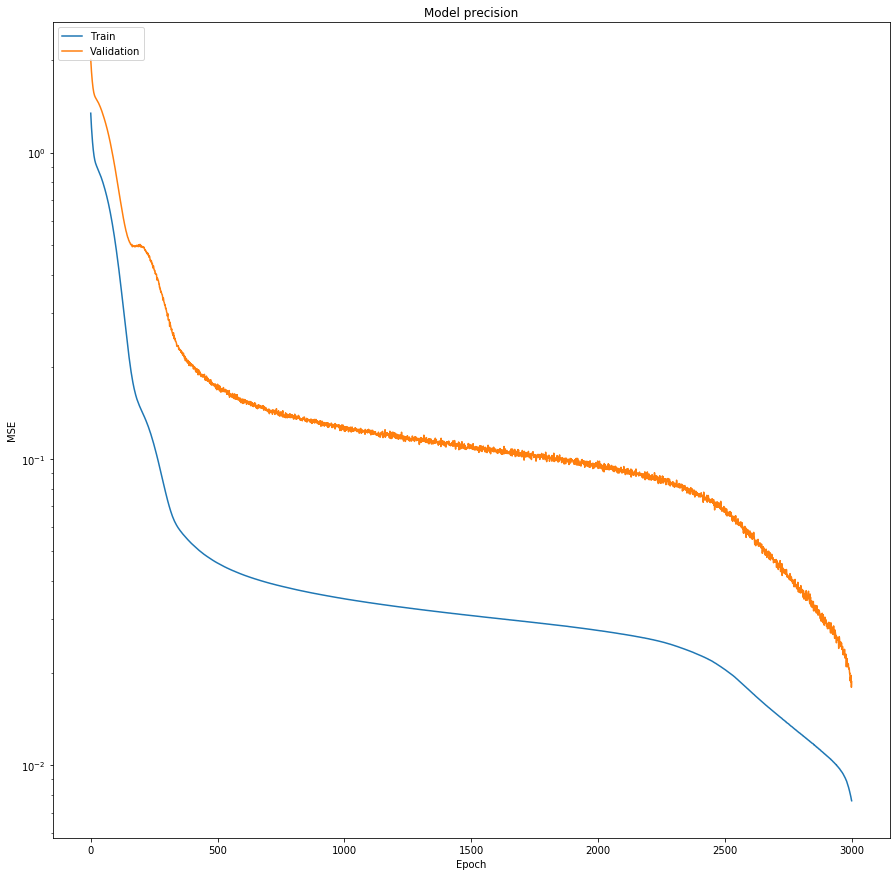

In [30]:
plt.figure(figsize=(15,15))
plt.plot(history_cache.history['mse'])
plt.plot(history_cache.history['val_mse'])
plt.title('Model precision')
plt.ylabel('MSE')
plt.yscale("log")
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.savefig("../images/NNtraining_tanh.png")

In [31]:
def neuralForce(xtmp,thetatmp,vtmp,dthetatmp):
    dataToProcess = np.array([xtmp,thetatmp,vtmp,dthetatmp]).reshape(1,4)
    return neuralController(dataToProcess,training=False)[0,0]

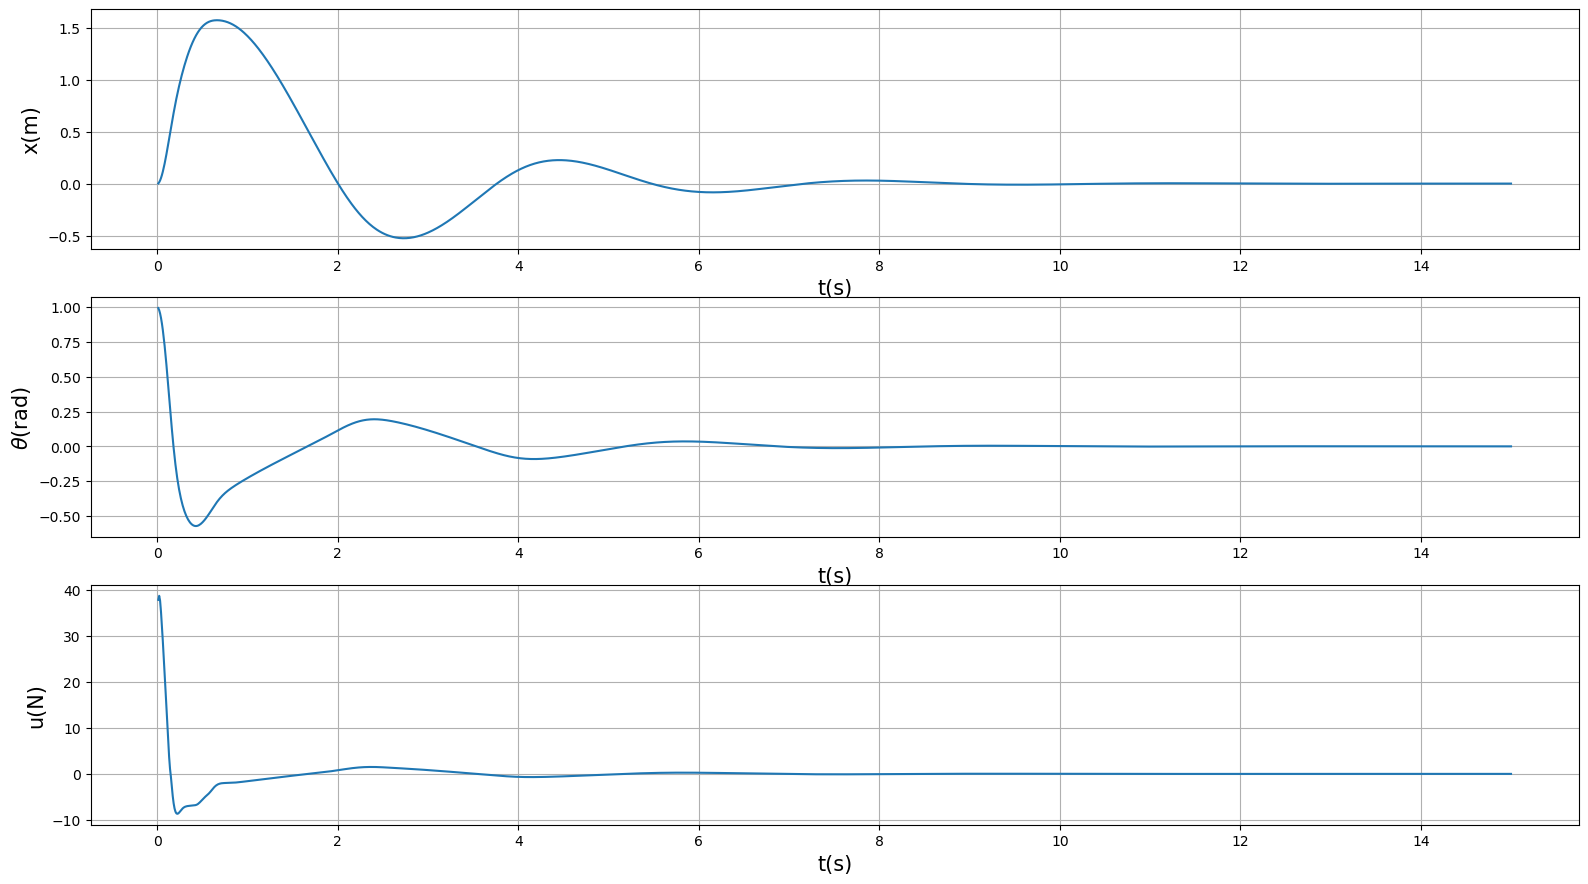

In [32]:
pendulo = sistemaPendulo(0,0,1,0,neuralForce, tstep)
fig, ax = plt.subplots(3,figsize=(19.20,10.80),dpi=100)
tmpv = []
for i in range(0,1500):
    tmpv.append(next(pendulo))
    #print(i)
ax[0].plot([aux[7] for aux in tmpv],[aux[0] for aux in tmpv])
ax[1].plot([aux[7] for aux in tmpv],[aux[3] for aux in tmpv])
ax[2].plot([aux[7] for aux in tmpv],[aux[6] for aux in tmpv])
ax[0].set_ylabel("x(m)",size=15)
ax[0].set_xlabel("t(s)",size=15)
ax[1].set_ylabel(r'$\theta$(rad)',size = 15)
ax[1].set_xlabel("t(s)",size=15)
ax[2].set_ylabel("u(N)",size=15)
ax[2].set_xlabel("t(s)",size=15)
ax[0].grid()
ax[1].grid()
ax[2].grid()
#plt.suptitle("Angulo inicial = 1 rad",size=20)
plt.savefig("../images/NNcontrol_Tanh.png")


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



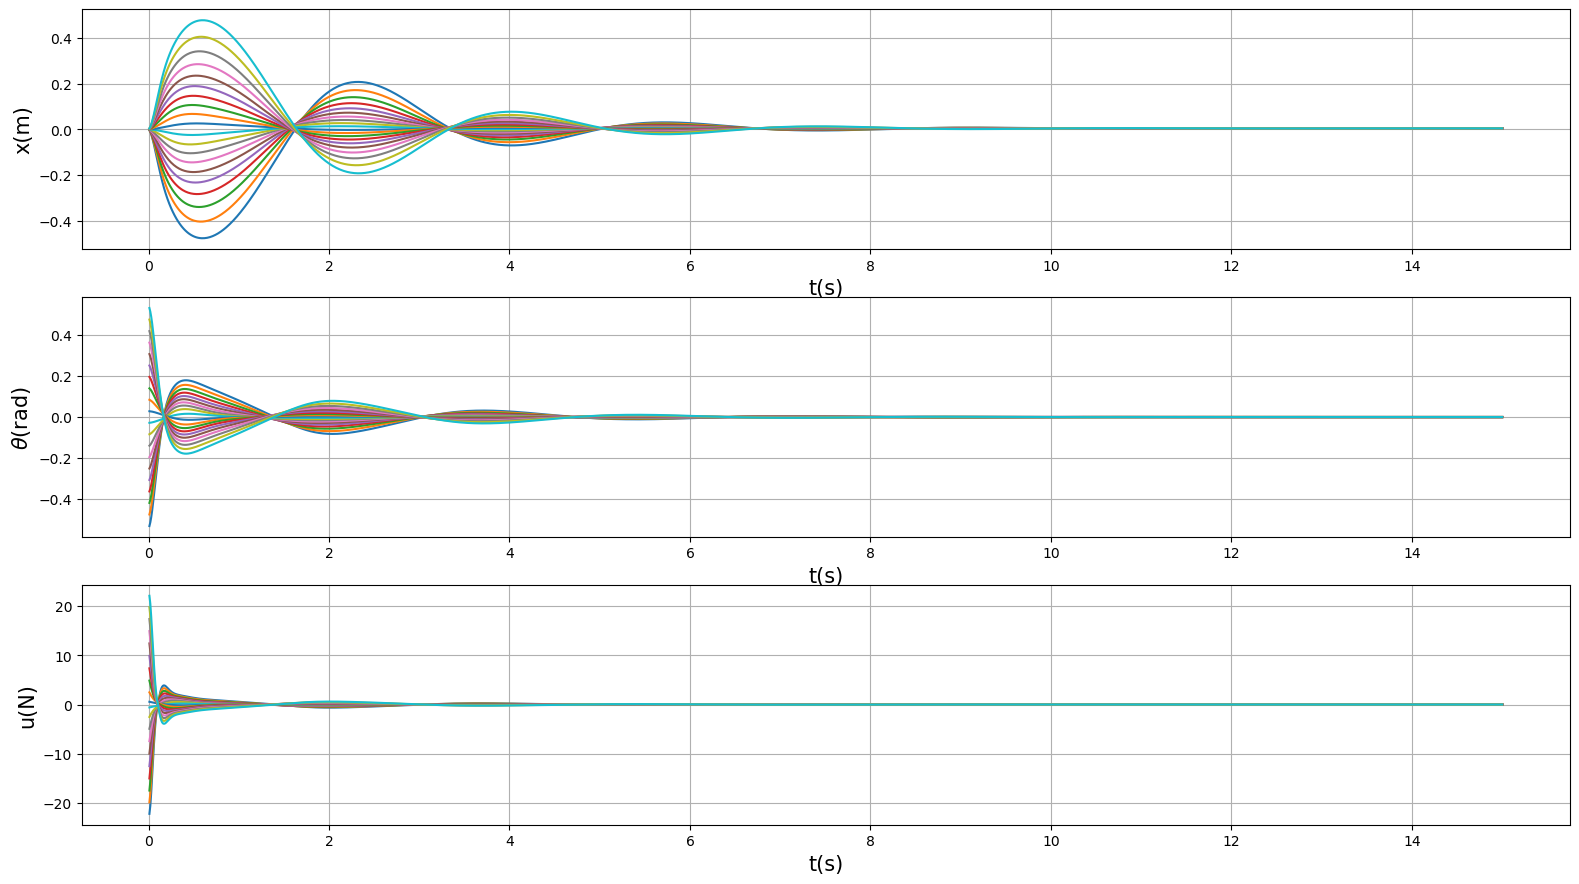

In [33]:
fig, ax = plt.subplots(3,figsize=(19.20,10.80),dpi=100)
for j in range(1,21):
    pendulo = sistemaPendulo(0,0,(j/21)*1.2-0.6,0,neuralForce, tstep)
    tmpv = []
    #print(j)
    for i in range(0,1500):
        tmpv.append(next(pendulo))
        #print(i)
    ax[0].plot([aux[7] for aux in tmpv],[aux[0] for aux in tmpv])
    ax[1].plot([aux[7] for aux in tmpv],[aux[3] for aux in tmpv])
    ax[2].plot([aux[7] for aux in tmpv],[aux[6] for aux in tmpv])
ax[0].set_ylabel("x(m)",size=15)
ax[0].set_xlabel("t(s)",size=15)
ax[1].set_ylabel(r'$\theta$(rad)',size = 15)
ax[1].set_xlabel("t(s)",size=15)
ax[2].set_ylabel("u(N)",size=15)
ax[2].set_xlabel("t(s)",size=15)
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.savefig("../images/NNcontrolAll_Tanh.png")

# Pouco neuronio

In [34]:
inputLayer = tf.keras.layers.Input(shape=(4,))
hiddenLayer_1 = tf.keras.layers.Dense(30,activation="relu")(inputLayer)
hiddenLayer_2 = tf.keras.layers.Dense(30,activation="relu")(hiddenLayer_1)
outputLayer = tf.keras.layers.Dense(1,activation = "linear")(hiddenLayer_2)
neuralController = tf.keras.Model(inputs=[inputLayer],outputs=[outputLayer])
neuralController.compile(loss="mse",metrics=["mse"],optimizer=tf.keras.optimizers.Adam(learning_rate=0.000005))

In [35]:
X_train = np.array(states_no_a.values[:,:-1])
Y_train = np.array(states_no_a.values[:,-1])

In [36]:
history_cache = neuralController.fit(X_train,Y_train,batch_size=1000,epochs=3000,validation_split=0.05,verbose=1,shuffle=1)

Train on 156750 samples, validate on 8250 samples
Epoch 1/3000
156750/156750 [==============================] - 1s 4us/sample - loss: 1.3426 - mse: 1.3426 - val_loss: 2.0363 - val_mse: 2.0363
Epoch 2/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.3391 - mse: 1.3391 - val_loss: 2.0326 - val_mse: 2.0326
Epoch 3/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.3357 - mse: 1.3357 - val_loss: 2.0288 - val_mse: 2.0288
Epoch 4/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.3323 - mse: 1.3323 - val_loss: 2.0251 - val_mse: 2.0251
Epoch 5/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.3290 - mse: 1.3290 - val_loss: 2.0215 - val_mse: 2.0215
Epoch 6/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.3257 - mse: 1.3257 - val_loss: 2.0179 - val_mse: 2.0179
Epoch 7/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.3225 - mse: 

156750/156750 [==============================] - 0s 2us/sample - loss: 1.1752 - mse: 1.1752 - val_loss: 1.8394 - val_mse: 1.8394
Epoch 59/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.1725 - mse: 1.1725 - val_loss: 1.8362 - val_mse: 1.8362
Epoch 60/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.1699 - mse: 1.1699 - val_loss: 1.8329 - val_mse: 1.8329
Epoch 61/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.1673 - mse: 1.1673 - val_loss: 1.8297 - val_mse: 1.8297
Epoch 62/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.1646 - mse: 1.1646 - val_loss: 1.8265 - val_mse: 1.8265
Epoch 63/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.1620 - mse: 1.1620 - val_loss: 1.8233 - val_mse: 1.8233
Epoch 64/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 1.1594 - mse: 1.1594 - val_loss: 1.8201 - val_mse: 1.8201
Epoch 65/3000

Epoch 172/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.9537 - mse: 0.9537 - val_loss: 1.5930 - val_mse: 1.5930
Epoch 173/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.9529 - mse: 0.9529 - val_loss: 1.5923 - val_mse: 1.5923
Epoch 174/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.9521 - mse: 0.9521 - val_loss: 1.5916 - val_mse: 1.5916
Epoch 175/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.9513 - mse: 0.9513 - val_loss: 1.5910 - val_mse: 1.5910
Epoch 176/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.9506 - mse: 0.9506 - val_loss: 1.5904 - val_mse: 1.5904
Epoch 177/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.9498 - mse: 0.9498 - val_loss: 1.5899 - val_mse: 1.5899
Epoch 178/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.9491 - mse: 0.9491 - val_loss: 1.5892 - val_mse:

Epoch 229/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.9179 - mse: 0.9179 - val_loss: 1.5611 - val_mse: 1.5611
Epoch 230/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.9174 - mse: 0.9174 - val_loss: 1.5605 - val_mse: 1.5605
Epoch 231/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.9168 - mse: 0.9168 - val_loss: 1.5600 - val_mse: 1.5600
Epoch 232/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.9162 - mse: 0.9163 - val_loss: 1.5593 - val_mse: 1.5593
Epoch 233/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.9157 - mse: 0.9157 - val_loss: 1.5588 - val_mse: 1.5588
Epoch 234/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.9152 - mse: 0.9152 - val_loss: 1.5582 - val_mse: 1.5582
Epoch 235/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.9146 - mse: 0.9146 - val_loss: 1.5577 - val_mse:

Epoch 286/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8856 - mse: 0.8856 - val_loss: 1.5250 - val_mse: 1.5250
Epoch 287/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8849 - mse: 0.8849 - val_loss: 1.5243 - val_mse: 1.5243
Epoch 288/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8843 - mse: 0.8843 - val_loss: 1.5235 - val_mse: 1.5235
Epoch 289/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8837 - mse: 0.8837 - val_loss: 1.5227 - val_mse: 1.5227
Epoch 290/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8831 - mse: 0.8831 - val_loss: 1.5219 - val_mse: 1.5219
Epoch 291/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8825 - mse: 0.8825 - val_loss: 1.5212 - val_mse: 1.5212
Epoch 292/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8818 - mse: 0.8818 - val_loss: 1.5204 - val_mse:

Epoch 343/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8471 - mse: 0.8471 - val_loss: 1.4775 - val_mse: 1.4775
Epoch 344/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8463 - mse: 0.8463 - val_loss: 1.4767 - val_mse: 1.4767
Epoch 345/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8456 - mse: 0.8456 - val_loss: 1.4758 - val_mse: 1.4758
Epoch 346/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8448 - mse: 0.8448 - val_loss: 1.4749 - val_mse: 1.4749
Epoch 347/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8441 - mse: 0.8441 - val_loss: 1.4739 - val_mse: 1.4739
Epoch 348/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8433 - mse: 0.8433 - val_loss: 1.4730 - val_mse: 1.4730
Epoch 349/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8426 - mse: 0.8426 - val_loss: 1.4720 - val_mse:

Epoch 400/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8057 - mse: 0.8057 - val_loss: 1.4253 - val_mse: 1.4253
Epoch 401/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8050 - mse: 0.8050 - val_loss: 1.4244 - val_mse: 1.4244
Epoch 402/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8042 - mse: 0.8042 - val_loss: 1.4234 - val_mse: 1.4234
Epoch 403/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8035 - mse: 0.8035 - val_loss: 1.4225 - val_mse: 1.4225
Epoch 404/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8028 - mse: 0.8028 - val_loss: 1.4217 - val_mse: 1.4217
Epoch 405/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8020 - mse: 0.8020 - val_loss: 1.4207 - val_mse: 1.4207
Epoch 406/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.8013 - mse: 0.8013 - val_loss: 1.4198 - val_mse:

Epoch 457/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.7639 - mse: 0.7639 - val_loss: 1.3751 - val_mse: 1.3751
Epoch 458/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.7632 - mse: 0.7632 - val_loss: 1.3743 - val_mse: 1.3743
Epoch 459/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.7625 - mse: 0.7625 - val_loss: 1.3733 - val_mse: 1.3733
Epoch 460/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.7617 - mse: 0.7617 - val_loss: 1.3725 - val_mse: 1.3725
Epoch 461/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.7610 - mse: 0.7610 - val_loss: 1.3717 - val_mse: 1.3717
Epoch 462/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.7602 - mse: 0.7602 - val_loss: 1.3707 - val_mse: 1.3707
Epoch 463/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.7595 - mse: 0.7595 - val_loss: 1.3698 - val_mse:

Epoch 514/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.7198 - mse: 0.7198 - val_loss: 1.3241 - val_mse: 1.3241
Epoch 515/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.7191 - mse: 0.7191 - val_loss: 1.3230 - val_mse: 1.3230
Epoch 516/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.7183 - mse: 0.7183 - val_loss: 1.3220 - val_mse: 1.3220
Epoch 517/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.7175 - mse: 0.7175 - val_loss: 1.3211 - val_mse: 1.3211
Epoch 518/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.7167 - mse: 0.7167 - val_loss: 1.3201 - val_mse: 1.3201
Epoch 519/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.7159 - mse: 0.7159 - val_loss: 1.3192 - val_mse: 1.3192
Epoch 520/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.7151 - mse: 0.7151 - val_loss: 1.3182 - val_mse:

Epoch 571/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.6737 - mse: 0.6737 - val_loss: 1.2660 - val_mse: 1.2660
Epoch 572/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.6729 - mse: 0.6729 - val_loss: 1.2648 - val_mse: 1.2648
Epoch 573/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.6721 - mse: 0.6721 - val_loss: 1.2638 - val_mse: 1.2638
Epoch 574/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.6712 - mse: 0.6712 - val_loss: 1.2627 - val_mse: 1.2627
Epoch 575/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.6704 - mse: 0.6704 - val_loss: 1.2617 - val_mse: 1.2617
Epoch 576/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.6695 - mse: 0.6695 - val_loss: 1.2607 - val_mse: 1.2607
Epoch 577/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.6687 - mse: 0.6687 - val_loss: 1.2595 - val_mse:

Epoch 628/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.6242 - mse: 0.6242 - val_loss: 1.2011 - val_mse: 1.2011
Epoch 629/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.6233 - mse: 0.6233 - val_loss: 1.1999 - val_mse: 1.1999
Epoch 630/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.6224 - mse: 0.6224 - val_loss: 1.1987 - val_mse: 1.1987
Epoch 631/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.6215 - mse: 0.6215 - val_loss: 1.1973 - val_mse: 1.1973
Epoch 632/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.6205 - mse: 0.6205 - val_loss: 1.1962 - val_mse: 1.1962
Epoch 633/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.6196 - mse: 0.6196 - val_loss: 1.1950 - val_mse: 1.1950
Epoch 634/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.6187 - mse: 0.6187 - val_loss: 1.1939 - val_mse:

Epoch 685/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.5709 - mse: 0.5709 - val_loss: 1.1301 - val_mse: 1.1301
Epoch 686/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.5699 - mse: 0.5699 - val_loss: 1.1288 - val_mse: 1.1288
Epoch 687/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.5690 - mse: 0.5690 - val_loss: 1.1275 - val_mse: 1.1275
Epoch 688/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.5680 - mse: 0.5680 - val_loss: 1.1261 - val_mse: 1.1261
Epoch 689/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.5670 - mse: 0.5670 - val_loss: 1.1248 - val_mse: 1.1248
Epoch 690/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.5660 - mse: 0.5660 - val_loss: 1.1235 - val_mse: 1.1235
Epoch 691/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.5651 - mse: 0.5651 - val_loss: 1.1222 - val_mse:

Epoch 742/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.5131 - mse: 0.5131 - val_loss: 1.0494 - val_mse: 1.0494
Epoch 743/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.5121 - mse: 0.5121 - val_loss: 1.0477 - val_mse: 1.0477
Epoch 744/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.5111 - mse: 0.5111 - val_loss: 1.0463 - val_mse: 1.0463
Epoch 745/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.5100 - mse: 0.5100 - val_loss: 1.0447 - val_mse: 1.0447
Epoch 746/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.5090 - mse: 0.5090 - val_loss: 1.0433 - val_mse: 1.0433
Epoch 747/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.5079 - mse: 0.5079 - val_loss: 1.0418 - val_mse: 1.0418
Epoch 748/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.5069 - mse: 0.5069 - val_loss: 1.0403 - val_mse:

Epoch 799/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.4519 - mse: 0.4519 - val_loss: 0.9577 - val_mse: 0.9577
Epoch 800/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.4508 - mse: 0.4508 - val_loss: 0.9559 - val_mse: 0.9559
Epoch 801/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.9540 - val_mse: 0.9540
Epoch 802/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.4487 - mse: 0.4487 - val_loss: 0.9524 - val_mse: 0.9524
Epoch 803/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.4476 - mse: 0.4476 - val_loss: 0.9507 - val_mse: 0.9507
Epoch 804/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.4465 - mse: 0.4465 - val_loss: 0.9489 - val_mse: 0.9489
Epoch 805/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.4454 - mse: 0.4454 - val_loss: 0.9472 - val_mse:

Epoch 856/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.3889 - mse: 0.3889 - val_loss: 0.8562 - val_mse: 0.8562
Epoch 857/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.3878 - mse: 0.3878 - val_loss: 0.8543 - val_mse: 0.8543
Epoch 858/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.3867 - mse: 0.3867 - val_loss: 0.8526 - val_mse: 0.8526
Epoch 859/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.3856 - mse: 0.3856 - val_loss: 0.8506 - val_mse: 0.8506
Epoch 860/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.3845 - mse: 0.3845 - val_loss: 0.8487 - val_mse: 0.8487
Epoch 861/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.3834 - mse: 0.3834 - val_loss: 0.8469 - val_mse: 0.8469
Epoch 862/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.3823 - mse: 0.3822 - val_loss: 0.8450 - val_mse:

Epoch 913/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.3252 - mse: 0.3252 - val_loss: 0.7463 - val_mse: 0.7463
Epoch 914/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.3241 - mse: 0.3241 - val_loss: 0.7443 - val_mse: 0.7443
Epoch 915/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.3230 - mse: 0.3230 - val_loss: 0.7425 - val_mse: 0.7425
Epoch 916/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.3219 - mse: 0.3219 - val_loss: 0.7405 - val_mse: 0.7405
Epoch 917/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.3208 - mse: 0.3208 - val_loss: 0.7385 - val_mse: 0.7385
Epoch 918/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.3197 - mse: 0.3197 - val_loss: 0.7365 - val_mse: 0.7365
Epoch 919/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.3186 - mse: 0.3186 - val_loss: 0.7347 - val_mse:

Epoch 970/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.2634 - mse: 0.2634 - val_loss: 0.6323 - val_mse: 0.6323
Epoch 971/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.2623 - mse: 0.2623 - val_loss: 0.6303 - val_mse: 0.6303
Epoch 972/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.2612 - mse: 0.2612 - val_loss: 0.6282 - val_mse: 0.6282
Epoch 973/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.2602 - mse: 0.2602 - val_loss: 0.6263 - val_mse: 0.6263
Epoch 974/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.2591 - mse: 0.2591 - val_loss: 0.6243 - val_mse: 0.6243
Epoch 975/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.2581 - mse: 0.2581 - val_loss: 0.6223 - val_mse: 0.6223
Epoch 976/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.2570 - mse: 0.2570 - val_loss: 0.6204 - val_mse:

Epoch 1027/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.2060 - mse: 0.2060 - val_loss: 0.5205 - val_mse: 0.5205
Epoch 1028/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.2051 - mse: 0.2051 - val_loss: 0.5186 - val_mse: 0.5186
Epoch 1029/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.2041 - mse: 0.2041 - val_loss: 0.5168 - val_mse: 0.5168
Epoch 1030/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.2032 - mse: 0.2032 - val_loss: 0.5150 - val_mse: 0.5150
Epoch 1031/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.2023 - mse: 0.2023 - val_loss: 0.5131 - val_mse: 0.5131
Epoch 1032/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.2014 - mse: 0.2014 - val_loss: 0.5113 - val_mse: 0.5113
Epoch 1033/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.2004 - mse: 0.2004 - val_loss: 0.5094 - v

156750/156750 [==============================] - 0s 2us/sample - loss: 0.1189 - mse: 0.1189 - val_loss: 0.3416 - val_mse: 0.3416
Epoch 1140/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.1183 - mse: 0.1183 - val_loss: 0.3405 - val_mse: 0.3405
Epoch 1141/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.1177 - mse: 0.1177 - val_loss: 0.3392 - val_mse: 0.3392
Epoch 1142/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.1171 - mse: 0.1171 - val_loss: 0.3381 - val_mse: 0.3381
Epoch 1143/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.1165 - mse: 0.1165 - val_loss: 0.3368 - val_mse: 0.3368
Epoch 1144/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.1159 - mse: 0.1159 - val_loss: 0.3357 - val_mse: 0.3357
Epoch 1145/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.1153 - mse: 0.1153 - val_loss: 0.3343 - val_mse: 0.3343
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0705 - mse: 0.0705 - val_loss: 0.2411 - val_mse: 0.2411
Epoch 1252/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0702 - mse: 0.0702 - val_loss: 0.2404 - val_mse: 0.2404
Epoch 1253/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0699 - mse: 0.0699 - val_loss: 0.2396 - val_mse: 0.2396
Epoch 1254/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0696 - mse: 0.0696 - val_loss: 0.2390 - val_mse: 0.2390
Epoch 1255/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0694 - mse: 0.0694 - val_loss: 0.2383 - val_mse: 0.2383
Epoch 1256/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0691 - mse: 0.0691 - val_loss: 0.2379 - val_mse: 0.2379
Epoch 1257/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0688 - mse: 0.0688 - val_loss: 0.2370 - val_mse: 0.2370
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0477 - mse: 0.0477 - val_loss: 0.1854 - val_mse: 0.1854
Epoch 1364/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0476 - mse: 0.0476 - val_loss: 0.1849 - val_mse: 0.1849
Epoch 1365/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0475 - mse: 0.0475 - val_loss: 0.1845 - val_mse: 0.1845
Epoch 1366/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0473 - mse: 0.0473 - val_loss: 0.1841 - val_mse: 0.1841
Epoch 1367/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0472 - mse: 0.0472 - val_loss: 0.1838 - val_mse: 0.1838
Epoch 1368/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0470 - mse: 0.0470 - val_loss: 0.1836 - val_mse: 0.1836
Epoch 1369/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0469 - mse: 0.0469 - val_loss: 0.1832 - val_mse: 0.1832
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0355 - mse: 0.0355 - val_loss: 0.1509 - val_mse: 0.1509
Epoch 1476/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0354 - mse: 0.0354 - val_loss: 0.1504 - val_mse: 0.1504
Epoch 1477/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0353 - mse: 0.0353 - val_loss: 0.1502 - val_mse: 0.1502
Epoch 1478/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0352 - mse: 0.0352 - val_loss: 0.1500 - val_mse: 0.1500
Epoch 1479/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0351 - mse: 0.0351 - val_loss: 0.1497 - val_mse: 0.1497
Epoch 1480/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0351 - mse: 0.0351 - val_loss: 0.1494 - val_mse: 0.1494
Epoch 1481/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0350 - mse: 0.0350 - val_loss: 0.1488 - val_mse: 0.1488
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0275 - mse: 0.0275 - val_loss: 0.1189 - val_mse: 0.1189
Epoch 1588/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0274 - mse: 0.0274 - val_loss: 0.1184 - val_mse: 0.1184
Epoch 1589/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0273 - mse: 0.0273 - val_loss: 0.1181 - val_mse: 0.1181
Epoch 1590/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0273 - mse: 0.0273 - val_loss: 0.1179 - val_mse: 0.1179
Epoch 1591/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0272 - mse: 0.0272 - val_loss: 0.1177 - val_mse: 0.1177
Epoch 1592/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0272 - mse: 0.0272 - val_loss: 0.1172 - val_mse: 0.1172
Epoch 1593/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0271 - mse: 0.0271 - val_loss: 0.1169 - val_mse: 0.1169
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0982 - val_mse: 0.0982
Epoch 1700/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0978 - val_mse: 0.0978
Epoch 1701/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0979 - val_mse: 0.0979
Epoch 1702/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0978 - val_mse: 0.0978
Epoch 1703/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0975 - val_mse: 0.0975
Epoch 1704/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0974 - val_mse: 0.0974
Epoch 1705/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0971 - val_mse: 0.0971
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0835 - val_mse: 0.0835
Epoch 1812/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0834 - val_mse: 0.0834
Epoch 1813/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0836 - val_mse: 0.0836
Epoch 1814/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0835 - val_mse: 0.0835
Epoch 1815/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0839 - val_mse: 0.0839
Epoch 1816/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0835 - val_mse: 0.0835
Epoch 1817/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0833 - val_mse: 0.0833
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0755 - val_mse: 0.0755
Epoch 1924/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0755 - val_mse: 0.0755
Epoch 1925/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0755 - val_mse: 0.0755
Epoch 1926/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0757 - val_mse: 0.0757
Epoch 1927/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0754 - val_mse: 0.0754
Epoch 1928/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0758 - val_mse: 0.0758
Epoch 1929/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0754 - val_mse: 0.0754
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0695 - val_mse: 0.0695
Epoch 2036/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0698 - val_mse: 0.0698
Epoch 2037/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0692 - val_mse: 0.0692
Epoch 2038/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0698 - val_mse: 0.0698
Epoch 2039/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0694 - val_mse: 0.0694
Epoch 2040/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0693 - val_mse: 0.0693
Epoch 2041/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0696 - val_mse: 0.0696
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0637 - val_mse: 0.0637
Epoch 2148/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0638 - val_mse: 0.0638
Epoch 2149/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0635 - val_mse: 0.0635
Epoch 2150/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0640 - val_mse: 0.0640
Epoch 2151/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0634 - val_mse: 0.0634
Epoch 2152/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0637 - val_mse: 0.0637
Epoch 2153/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0633 - val_mse: 0.0633
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 2260/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0576 - val_mse: 0.0576
Epoch 2261/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0583 - val_mse: 0.0583
Epoch 2262/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0583 - val_mse: 0.0583
Epoch 2263/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0582 - val_mse: 0.0582
Epoch 2264/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0579 - val_mse: 0.0579
Epoch 2265/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0581 - val_mse: 0.0581
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0529 - val_mse: 0.0529
Epoch 2372/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0538 - val_mse: 0.0538
Epoch 2373/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0528 - val_mse: 0.0528
Epoch 2374/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0529 - val_mse: 0.0529
Epoch 2375/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0533 - val_mse: 0.0533
Epoch 2376/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0529 - val_mse: 0.0529
Epoch 2377/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0529 - val_mse: 0.0529
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0488 - val_mse: 0.0488
Epoch 2484/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0487 - val_mse: 0.0487
Epoch 2485/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 2486/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0484 - val_mse: 0.0484
Epoch 2487/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0486 - val_mse: 0.0486
Epoch 2488/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0484 - val_mse: 0.0484
Epoch 2489/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0487 - val_mse: 0.0487
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0447 - val_mse: 0.0447
Epoch 2596/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0446 - val_mse: 0.0446
Epoch 2597/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0450 - val_mse: 0.0450
Epoch 2598/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0450 - val_mse: 0.0450
Epoch 2599/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0442 - val_mse: 0.0442
Epoch 2600/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0447 - val_mse: 0.0447
Epoch 2601/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0441 - val_mse: 0.0441
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0414 - val_mse: 0.0414
Epoch 2708/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0416 - val_mse: 0.0416
Epoch 2709/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0420 - val_mse: 0.0420
Epoch 2710/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0416 - val_mse: 0.0416
Epoch 2711/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0418 - val_mse: 0.0418
Epoch 2712/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0415 - val_mse: 0.0415
Epoch 2713/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0420 - val_mse: 0.0420
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0389 - val_mse: 0.0389
Epoch 2820/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 2821/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0386 - val_mse: 0.0386
Epoch 2822/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 2823/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0385 - val_mse: 0.0385
Epoch 2824/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0385 - val_mse: 0.0385
Epoch 2825/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0386 - val_mse: 0.0386
E

156750/156750 [==============================] - 0s 2us/sample - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0361 - val_mse: 0.0361
Epoch 2932/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0359 - val_mse: 0.0359
Epoch 2933/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0356 - val_mse: 0.0356
Epoch 2934/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 2935/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 2936/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0361 - val_mse: 0.0361
Epoch 2937/3000
156750/156750 [==============================] - 0s 2us/sample - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0361 - val_mse: 0.0361
E

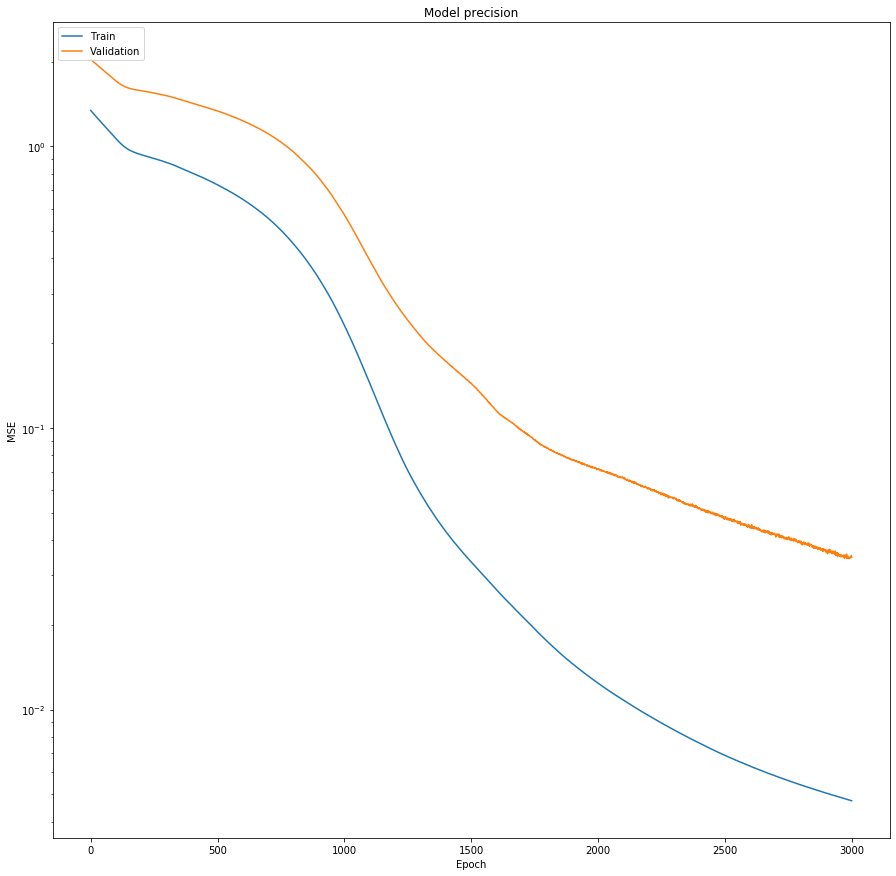

In [37]:
plt.figure(figsize=(15,15))
plt.plot(history_cache.history['mse'])
plt.plot(history_cache.history['val_mse'])
plt.title('Model precision')
plt.ylabel('MSE')
plt.yscale("log")
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.savefig("../images/NNtraining_30n.png")

In [38]:
def neuralForce(xtmp,thetatmp,vtmp,dthetatmp):
    dataToProcess = np.array([xtmp,thetatmp,vtmp,dthetatmp]).reshape(1,4)
    return neuralController(dataToProcess,training=False)[0,0]

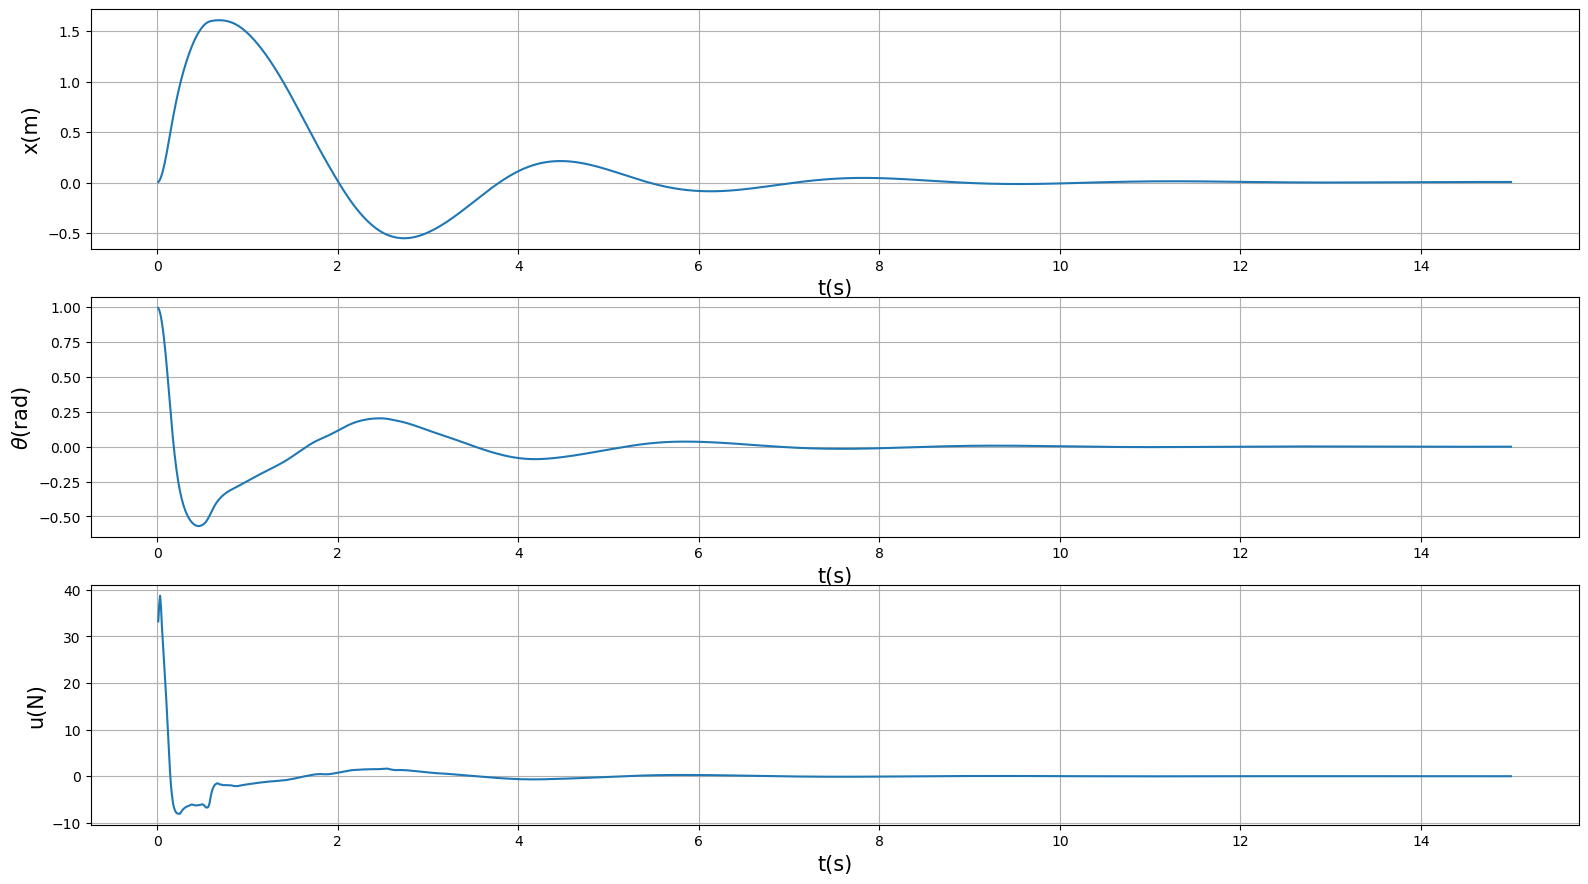

In [39]:
pendulo = sistemaPendulo(0,0,1,0,neuralForce, tstep)
fig, ax = plt.subplots(3,figsize=(19.20,10.80),dpi=100)
tmpv = []
for i in range(0,1500):
    tmpv.append(next(pendulo))
    #print(i)
ax[0].plot([aux[7] for aux in tmpv],[aux[0] for aux in tmpv])
ax[1].plot([aux[7] for aux in tmpv],[aux[3] for aux in tmpv])
ax[2].plot([aux[7] for aux in tmpv],[aux[6] for aux in tmpv])
ax[0].set_ylabel("x(m)",size=15)
ax[0].set_xlabel("t(s)",size=15)
ax[1].set_ylabel(r'$\theta$(rad)',size = 15)
ax[1].set_xlabel("t(s)",size=15)
ax[2].set_ylabel("u(N)",size=15)
ax[2].set_xlabel("t(s)",size=15)
ax[0].grid()
ax[1].grid()
ax[2].grid()
#plt.suptitle("Angulo inicial = 1 rad",size=20)
plt.savefig("../images/NNcontrol_30n.png")


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



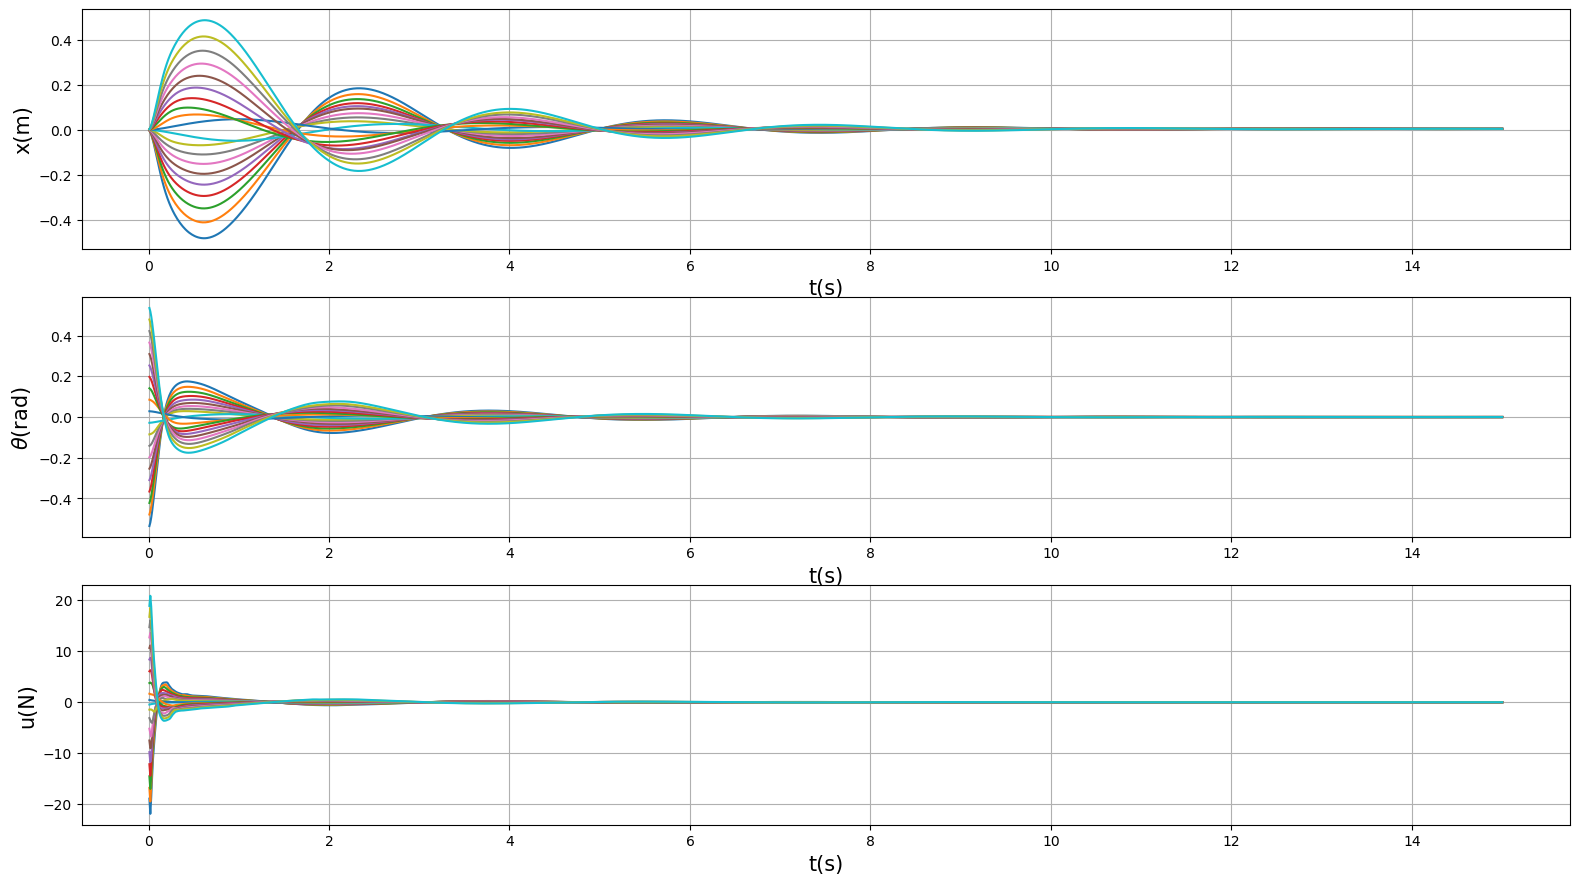

In [40]:
fig, ax = plt.subplots(3,figsize=(19.20,10.80),dpi=100)
for j in range(1,21):
    pendulo = sistemaPendulo(0,0,(j/21)*1.2-0.6,0,neuralForce, tstep)
    tmpv = []
    #print(j)
    for i in range(0,1500):
        tmpv.append(next(pendulo))
        #print(i)
    ax[0].plot([aux[7] for aux in tmpv],[aux[0] for aux in tmpv])
    ax[1].plot([aux[7] for aux in tmpv],[aux[3] for aux in tmpv])
    ax[2].plot([aux[7] for aux in tmpv],[aux[6] for aux in tmpv])
ax[0].set_ylabel("x(m)",size=15)
ax[0].set_xlabel("t(s)",size=15)
ax[1].set_ylabel(r'$\theta$(rad)',size = 15)
ax[1].set_xlabel("t(s)",size=15)
ax[2].set_ylabel("u(N)",size=15)
ax[2].set_xlabel("t(s)",size=15)
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.savefig("../images/NNcontrolAll_30n.png")